In [20]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
months = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December",
}

In [22]:
file_path = "../data/raw/togo-dapaong_qc.csv"
df = pd.read_csv(file_path)

In [23]:
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [24]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

df["Day"] = df["Timestamp"].dt.day
df["Year"] = df["Timestamp"].dt.year
df["Month"] = df["Timestamp"].dt.month
df["Time"] = df["Timestamp"].dt.strftime("%I:%M %p")
df["Day_Name"] = df["Timestamp"].dt.strftime("%A")
df["Month_Name"] = df["Timestamp"].dt.strftime("%B")

df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,...,Precipitation,TModA,TModB,Comments,Day,Year,Month,Time,Day_Name,Month_Name
0,2021-10-25 00:01:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,...,0.0,24.7,24.4,NaN,25,2021,10,12:01 AM,Monday,October
1,2021-10-25 00:02:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,...,0.0,24.7,24.4,NaN,25,2021,10,12:02 AM,Monday,October
2,2021-10-25 00:03:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,...,0.0,24.7,24.4,NaN,25,2021,10,12:03 AM,Monday,October
3,2021-10-25 00:04:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,...,0.0,24.7,24.4,NaN,25,2021,10,12:04 AM,Monday,October
4,2021-10-25 00:05:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,...,0.0,24.7,24.4,NaN,25,2021,10,12:05 AM,Monday,October


#### How to handle the negative values in the GHI, DNI, and DHI?

Here I made the decision to apply data shifting technique to not lose the distribution of the data. My justification for this is because I think that night values should not matter, since sunlight does not generally have much meaning at night time, and by applying data shifting technique I won't lose the distribution of the data.

**NOTE**: This approach might not be optimal hence might result in unexpected results.

In [25]:
min_ghi = df["GHI"].min()
shift_value = abs(min_ghi)

print(
    f"The minimum value is: {min_ghi}, so the shift value for the GHI is {shift_value}\n"
)

df["GHI"] = df["GHI"] + shift_value

print("Extremes range after data shift is applied.\n")
print(f"The max and min value are: {df["GHI"].max()} and {df['GHI'].min()} respectively.")

The minimum value is: -12.7, so the shift value for the GHI is 12.7

Extremes range after data shift is applied.

The max and min value are: 1436.7 and 0.0 respectively.


In [26]:
min_dhi = df["DHI"].min()
shift_value = abs(min_dhi)

print(
    f"The minimum value is: {min_dhi}, so the shift value for the DHI is {shift_value}\n"
)

df["DHI"] = df["DHI"] + shift_value

print("Extremes range after data shift is applied.\n")
print(f"The max and min value are: {df["DHI"].max()} and {df['DHI'].min()} respectively.")

The minimum value is: 0.0, so the shift value for the DHI is 0.0

Extremes range after data shift is applied.

The max and min value are: 805.7 and 0.0 respectively.


In [27]:
min_dni = df["DNI"].min()
shift_value = abs(min_dni)

print(
    f"The minimum value is: {min_dni}, so the shift value for the DNI is {shift_value}:\n"
)

df["DNI"] = df["DNI"] + shift_value

print("Extremes range after data shift is applied:")
print(f"The max and the min value are: {df["DNI"].max()} and {df["DNI"].min()} respectively.")

The minimum value is: 0.0, so the shift value for the DNI is 0.0:

Extremes range after data shift is applied:
The max and the min value are: 1004.5 and 0.0 respectively.


### Dropping NA values that are the in the dataset

The `Comments` column all values are NA so I need to drop it.

In [28]:
df.drop(axis=1, columns=["Comments"], inplace=True)

In [29]:
grouped_by_year = (
    df.groupby(["Year", "Month", "Day"])[["GHI", "DNI", "DHI"]].mean().reset_index()
)

### Some Statistics about the data for the year. The below statistics is for the year where the mean is calculated by finding the mean GHI, DNI, and DHI for the day in each month, year.

In [30]:
summary_stats = grouped_by_year.describe()

summary_stats  # This is some summary stats for the DNI, GHI, and DHI

,Year,Month,Day,GHI,DNI,DHI
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2021.814208,6.535519,15.745902,242.622243,150.845408,116.126464
std,0.389471,3.452630,8.809610,50.545786,86.435052,33.411853
min,2021.000000,1.000000,1.000000,11.500000,0.000000,0.000000
25%,2022.000000,4.000000,8.000000,224.908785,81.359080,93.572899
50%,2022.000000,7.000000,16.000000,255.841181,151.873924,118.562674
75%,2022.000000,10.000000,23.000000,276.443993,218.317726,139.655326
max,2022.000000,12.000000,31.000000,312.084583,335.232569,207.672222


## How do the GHI, DNI, and DHI change over the Day in a months, and Year?

#### Mean GHI Change Over the Month

In [31]:
## Plotting the Summary Statistics for the GHI, DNI, and DHI
ghi_group = df.groupby(["Month", "Year", "Day"])["GHI"].mean().reset_index()

ghi_group.head()

,Month,Year,Day,GHI
0,1,2022,1,255.996528
1,1,2022,2,252.549861
2,1,2022,3,106.378056
3,1,2022,4,181.231319
4,1,2022,5,241.512917


In [32]:
mean_ghi_by_day = ghi_group.pivot(
    index=["Month", "Year"], columns="Day", values="GHI"
).sort_values("Year")


mean_ghi_by_day.head()

,Day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
Month,Year,,,,,,,,,,,,,,,,,,,,,
10,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,229.684434,274.325347,268.090139,261.614514,277.974514,269.451389,236.190417
11,2021,229.858194,266.756667,269.737569,266.291111,252.861528,239.889236,270.547708,266.672222,255.797153,260.347917,...,262.926528,271.621319,265.981181,260.010000,261.577083,262.868542,270.929861,253.786736,251.678958,NaN
12,2021,252.165486,251.660278,242.764583,238.156875,246.525694,242.120764,212.646944,255.683958,256.691528,237.611528,...,236.147708,261.950347,239.805694,240.374583,250.375833,257.373819,252.610069,251.699931,262.698750,254.251806
1,2022,255.996528,252.549861,106.378056,181.231319,241.512917,239.563333,230.543819,235.322153,254.122569,245.497431,...,269.169167,275.645000,275.401042,269.736597,279.534097,260.221806,217.532431,241.200000,280.023819,288.325764
2,2022,287.561528,296.697847,281.009722,265.403889,253.442778,232.577500,227.952639,257.121736,262.754792,288.197917,...,279.088542,280.667639,284.756806,285.804931,288.610625,257.526736,244.884514,NaN,NaN,NaN


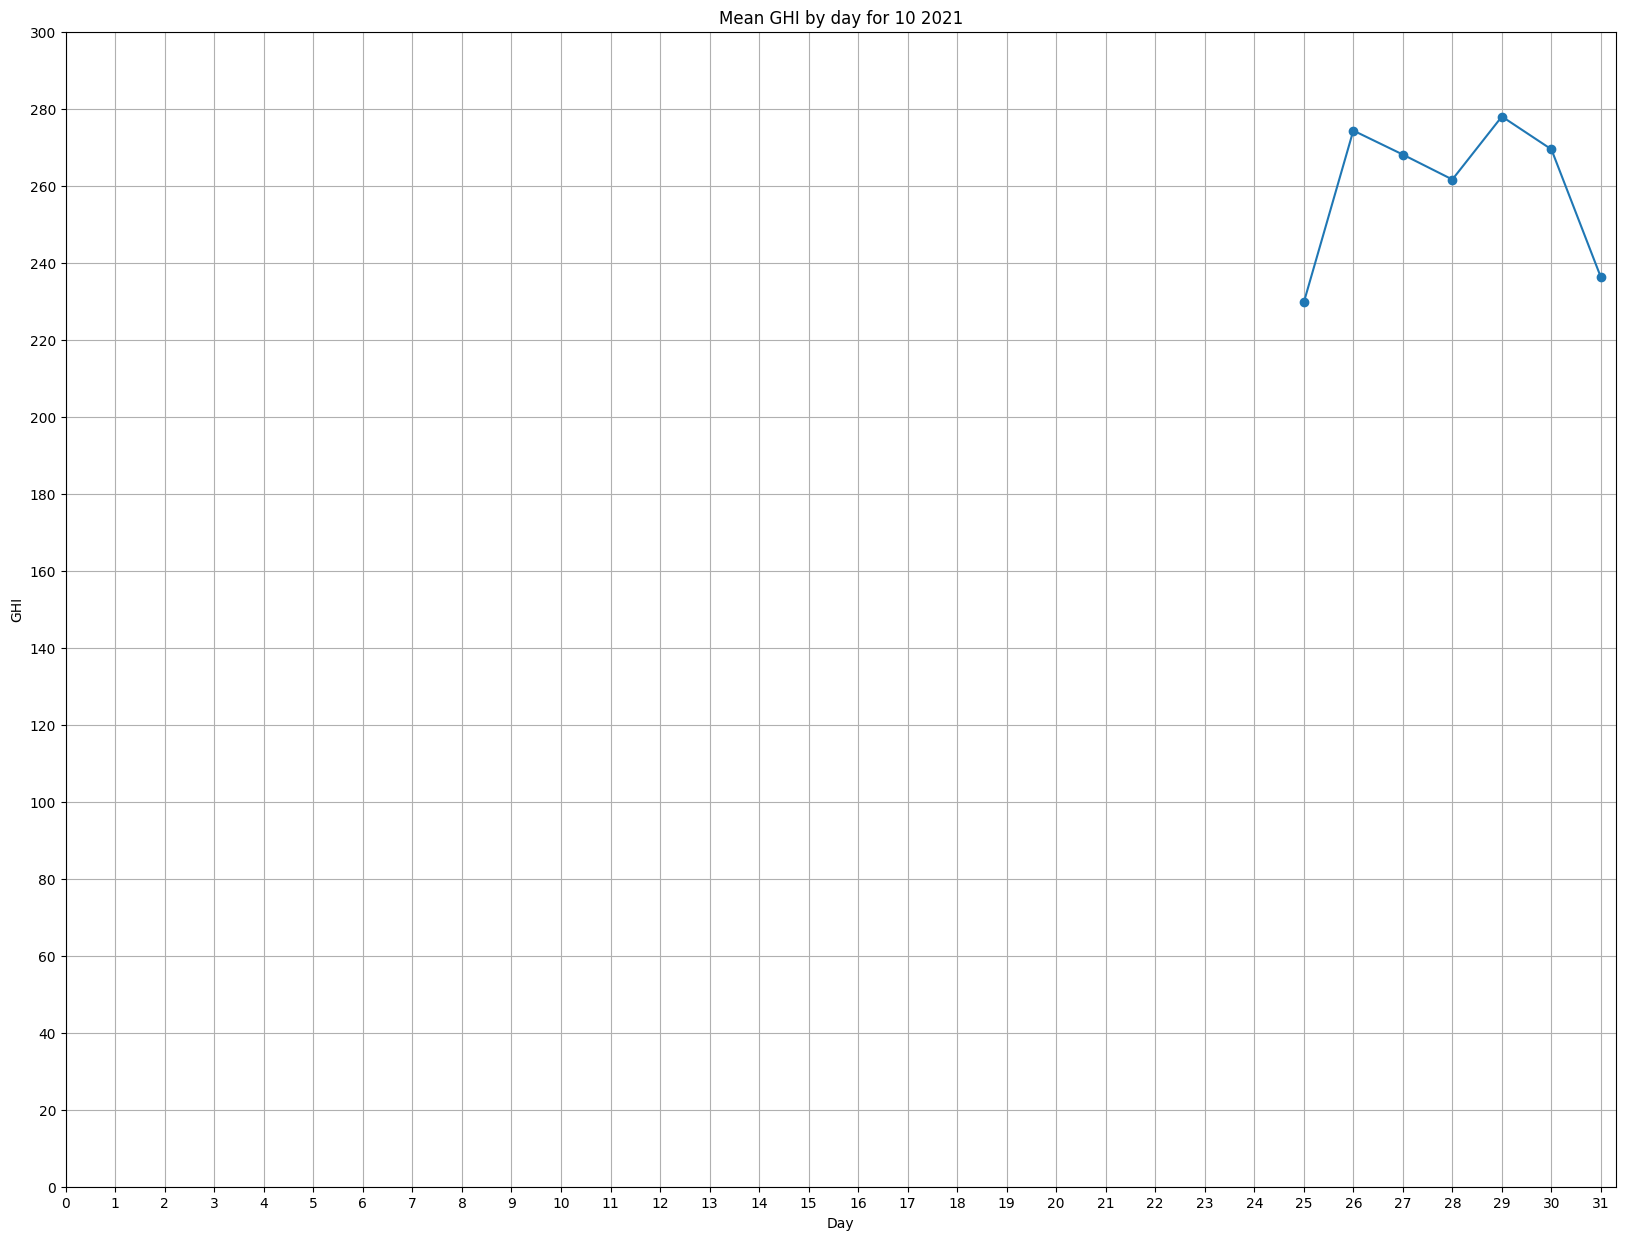

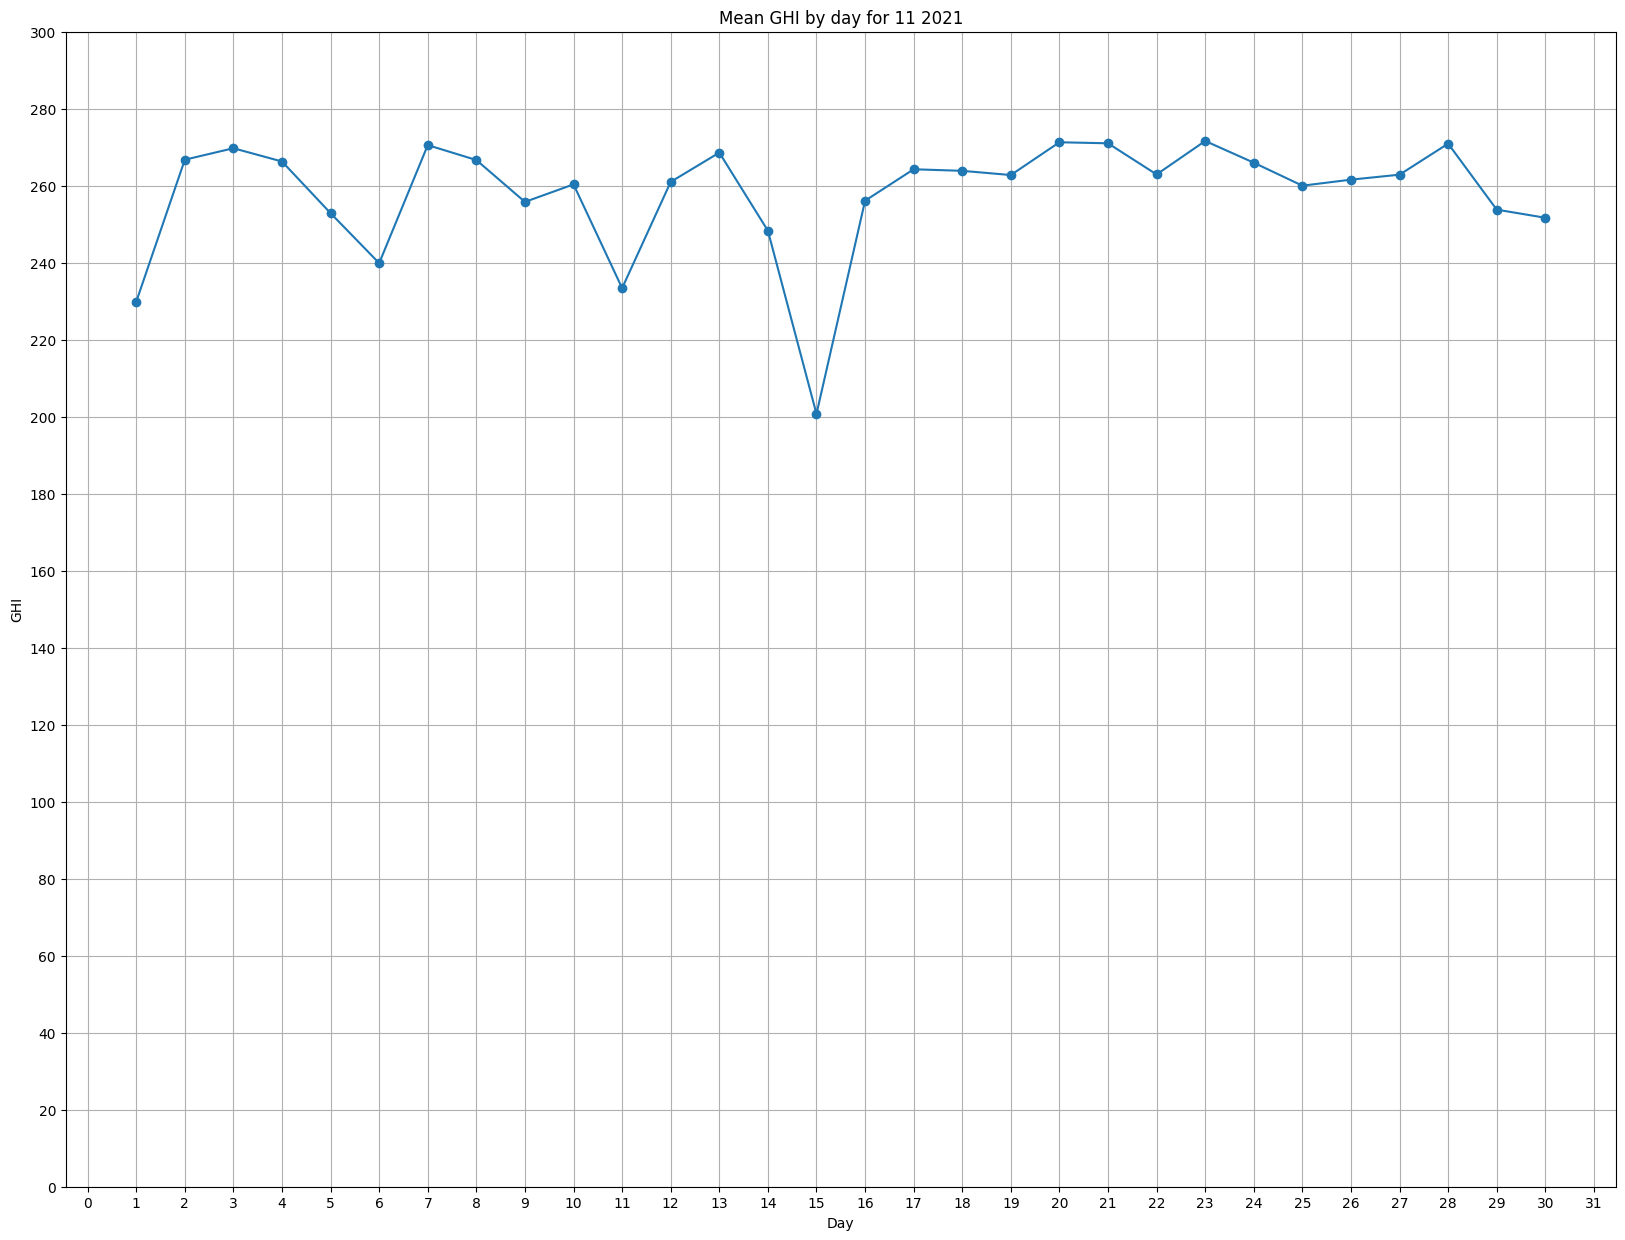

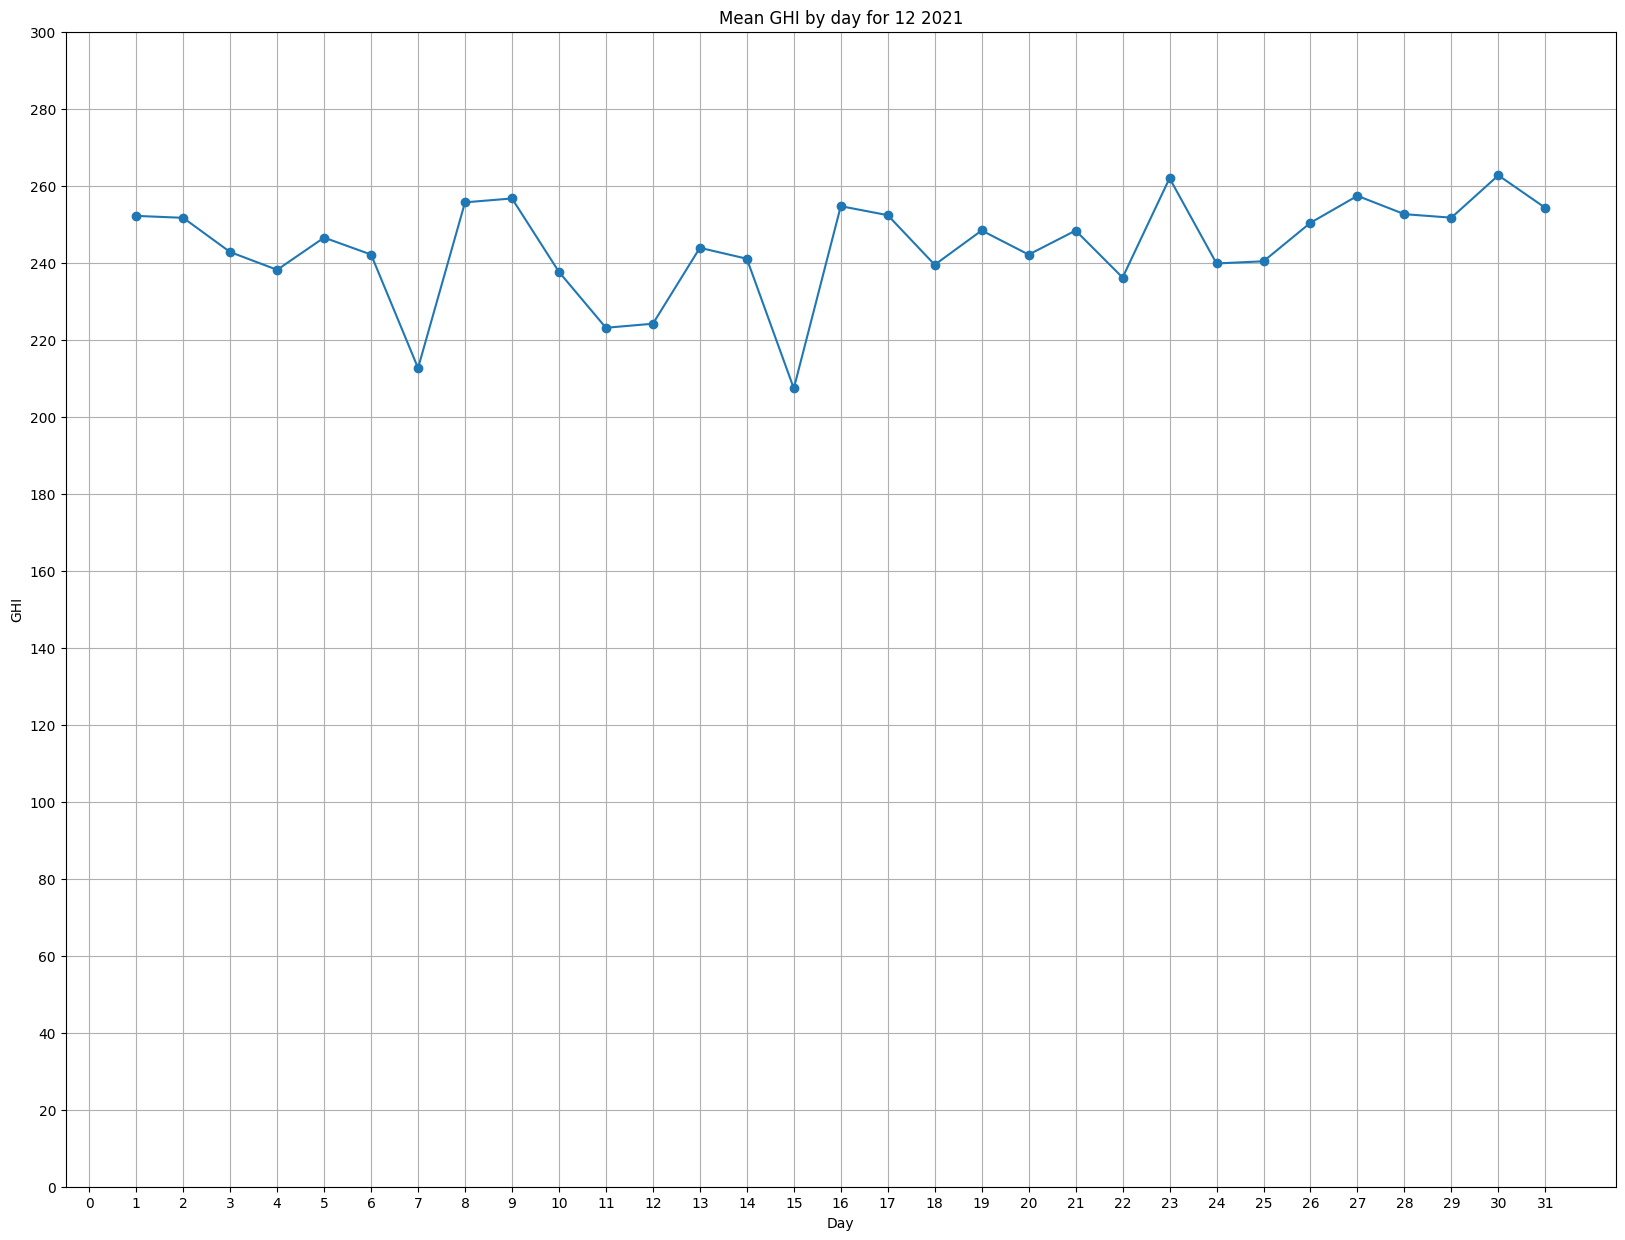

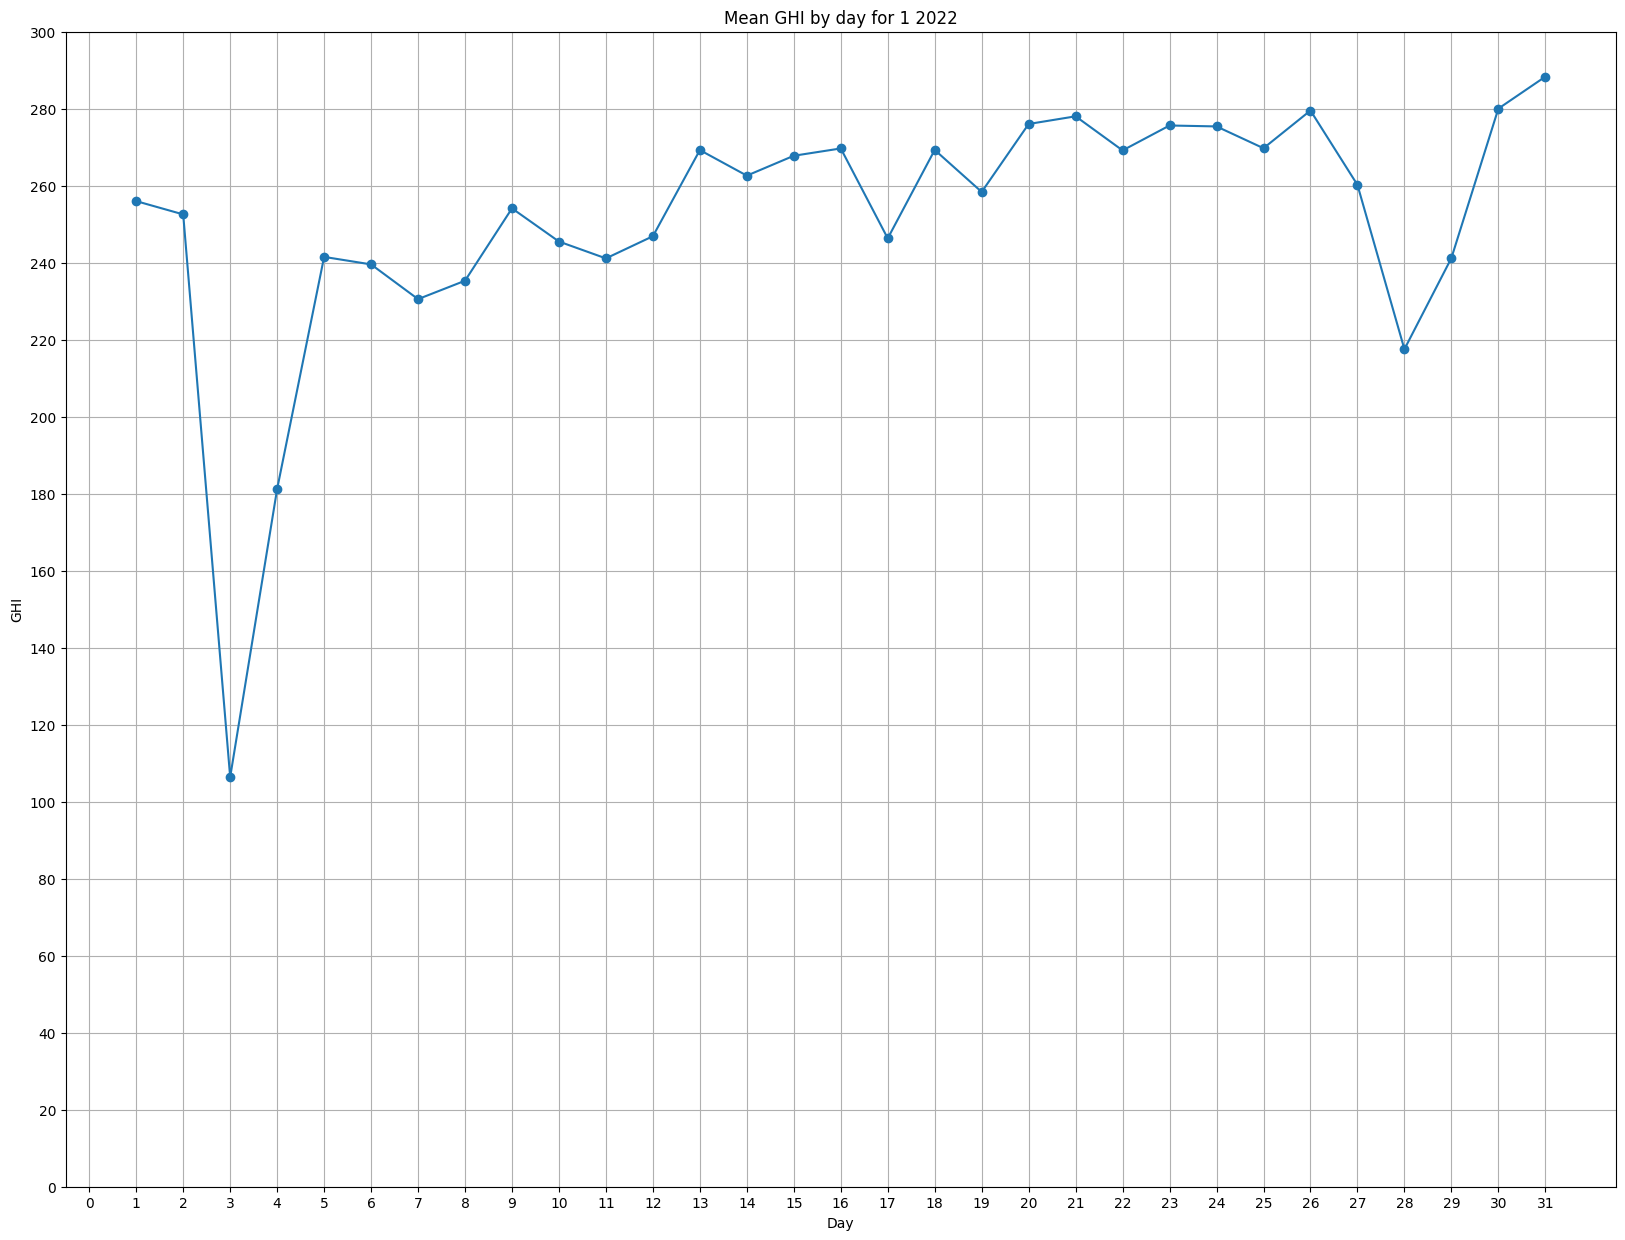

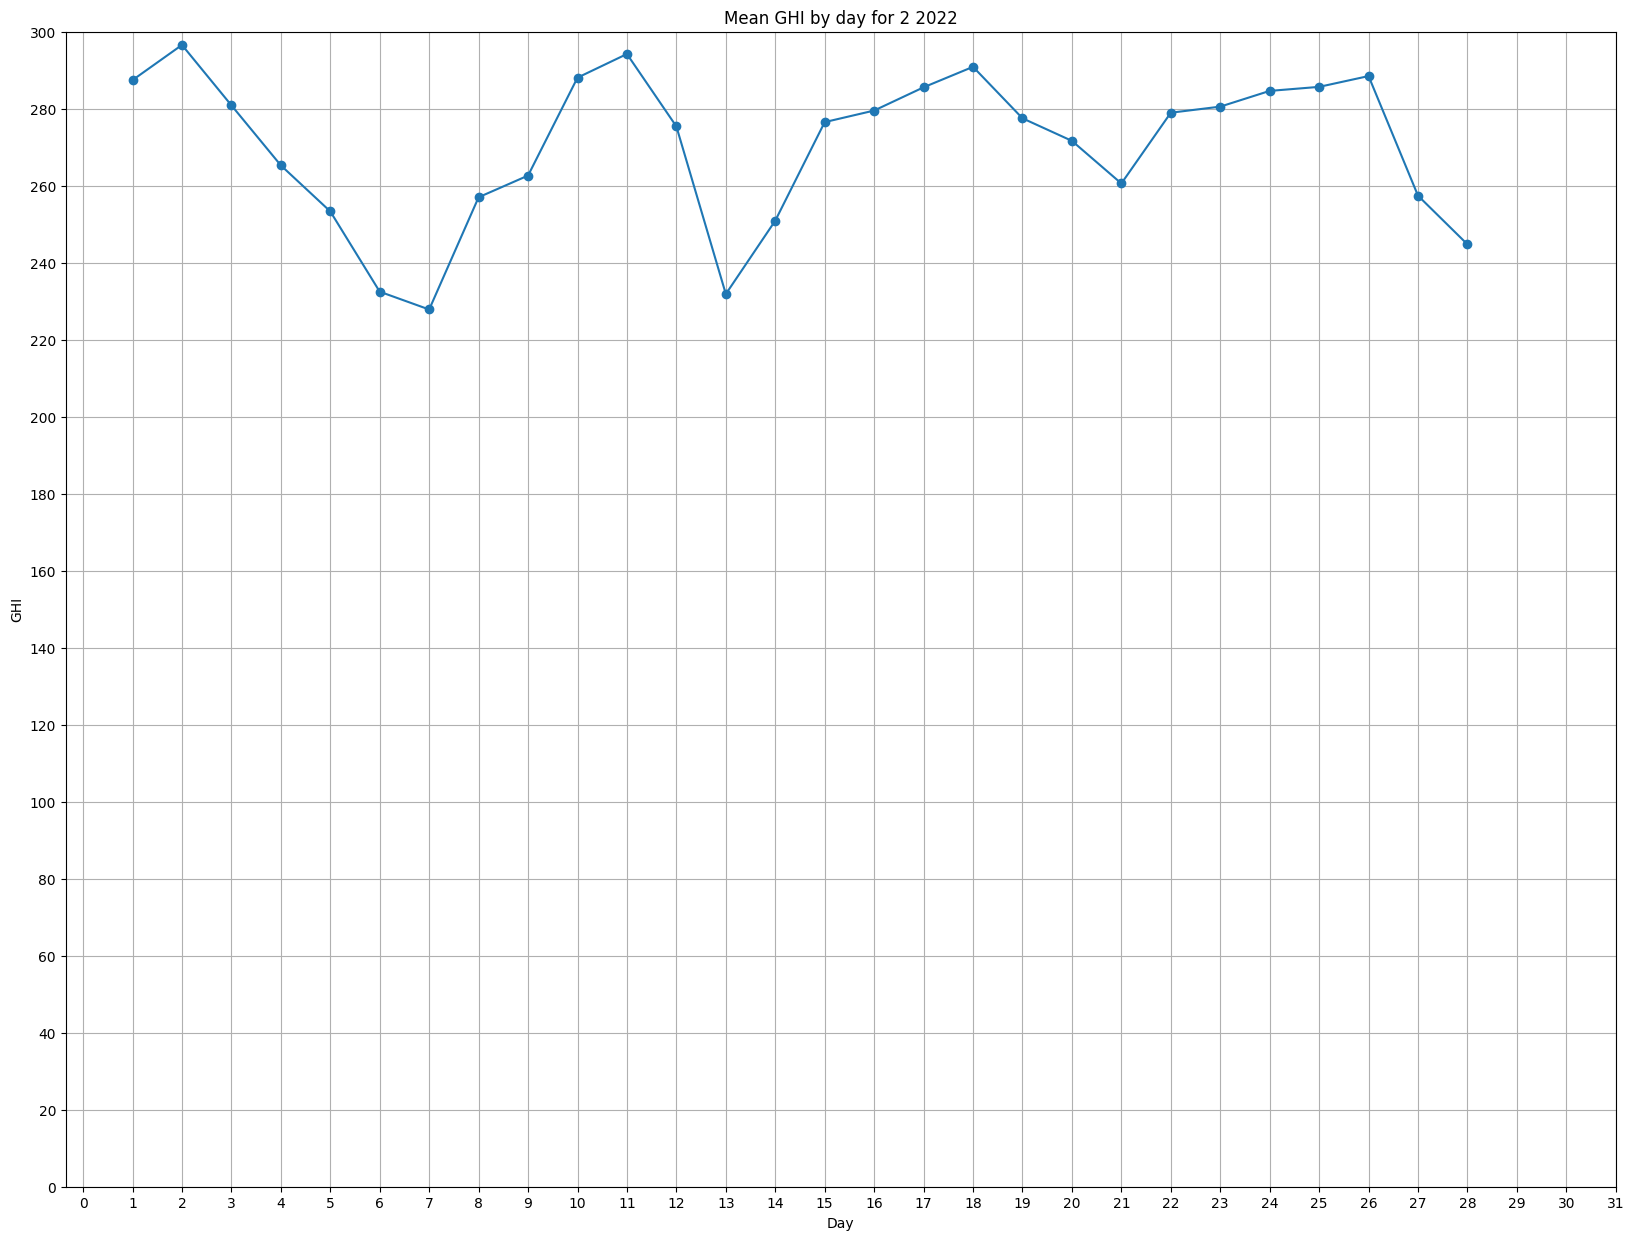

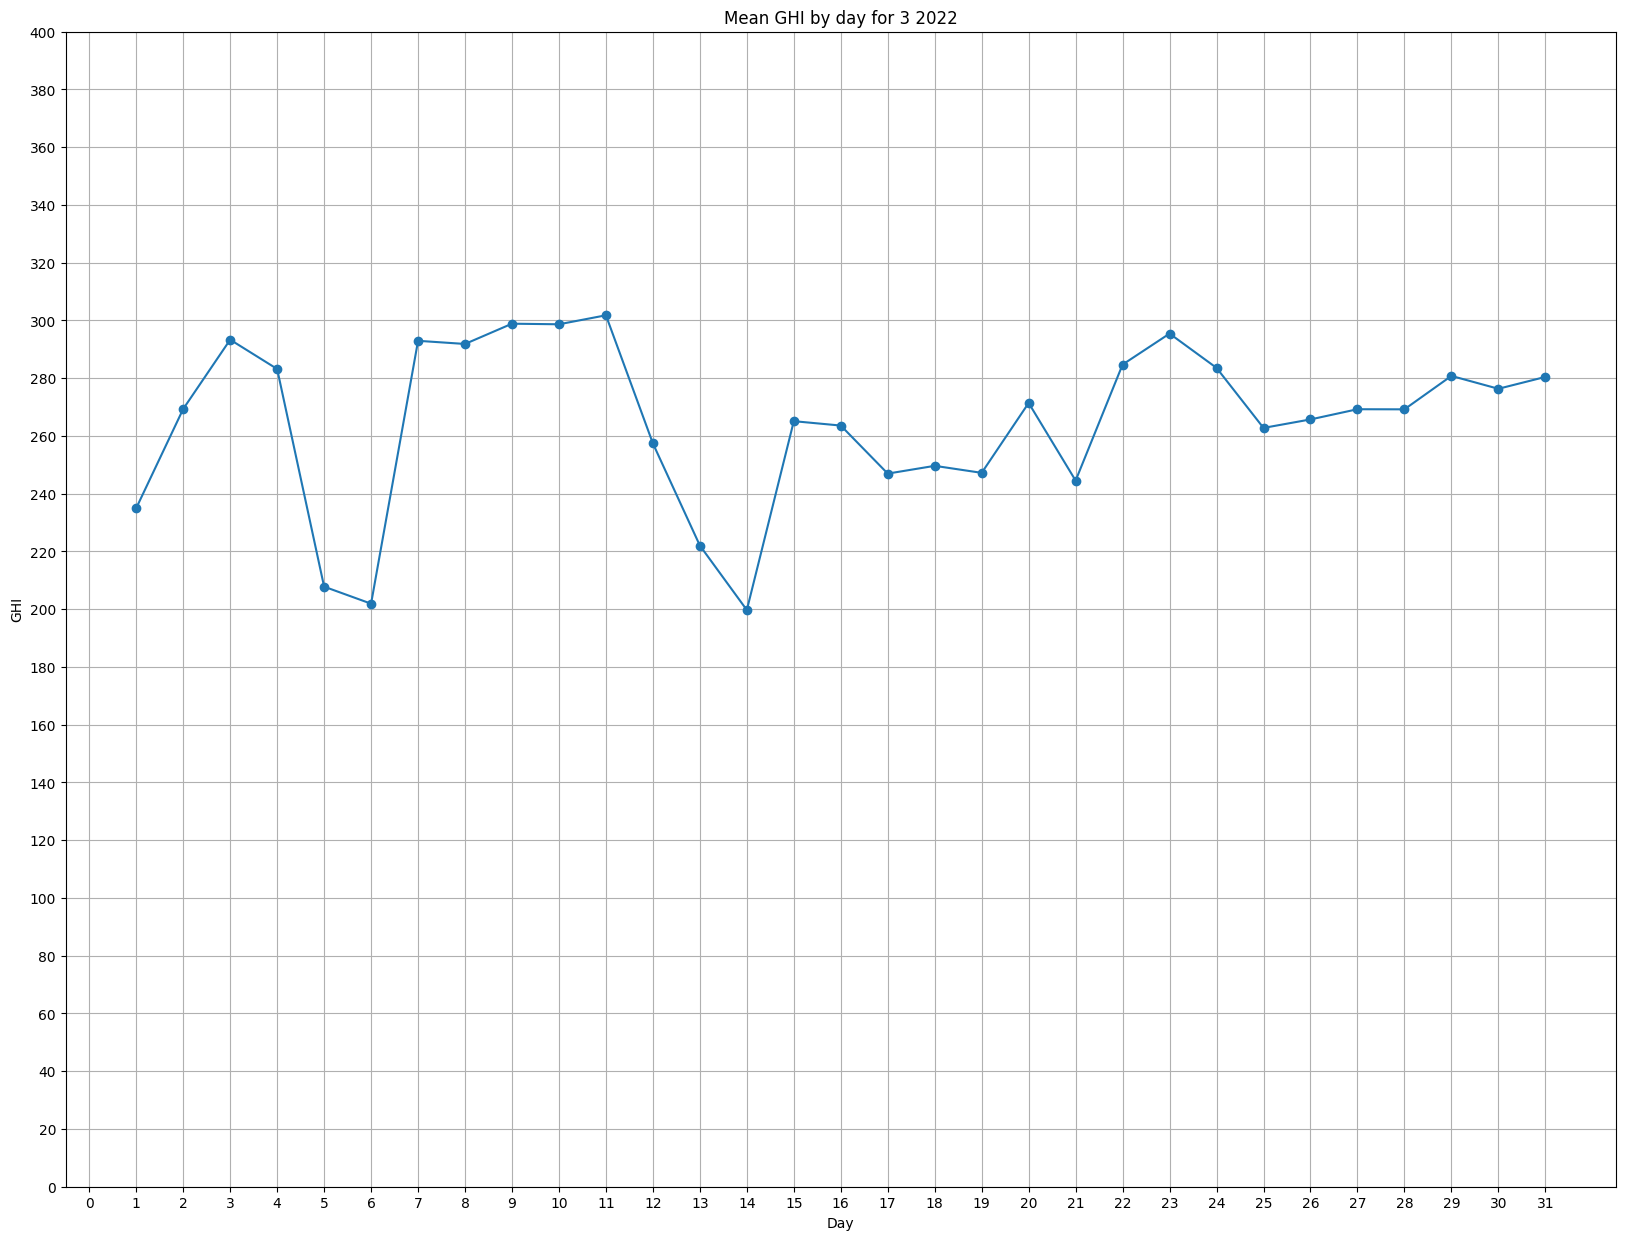

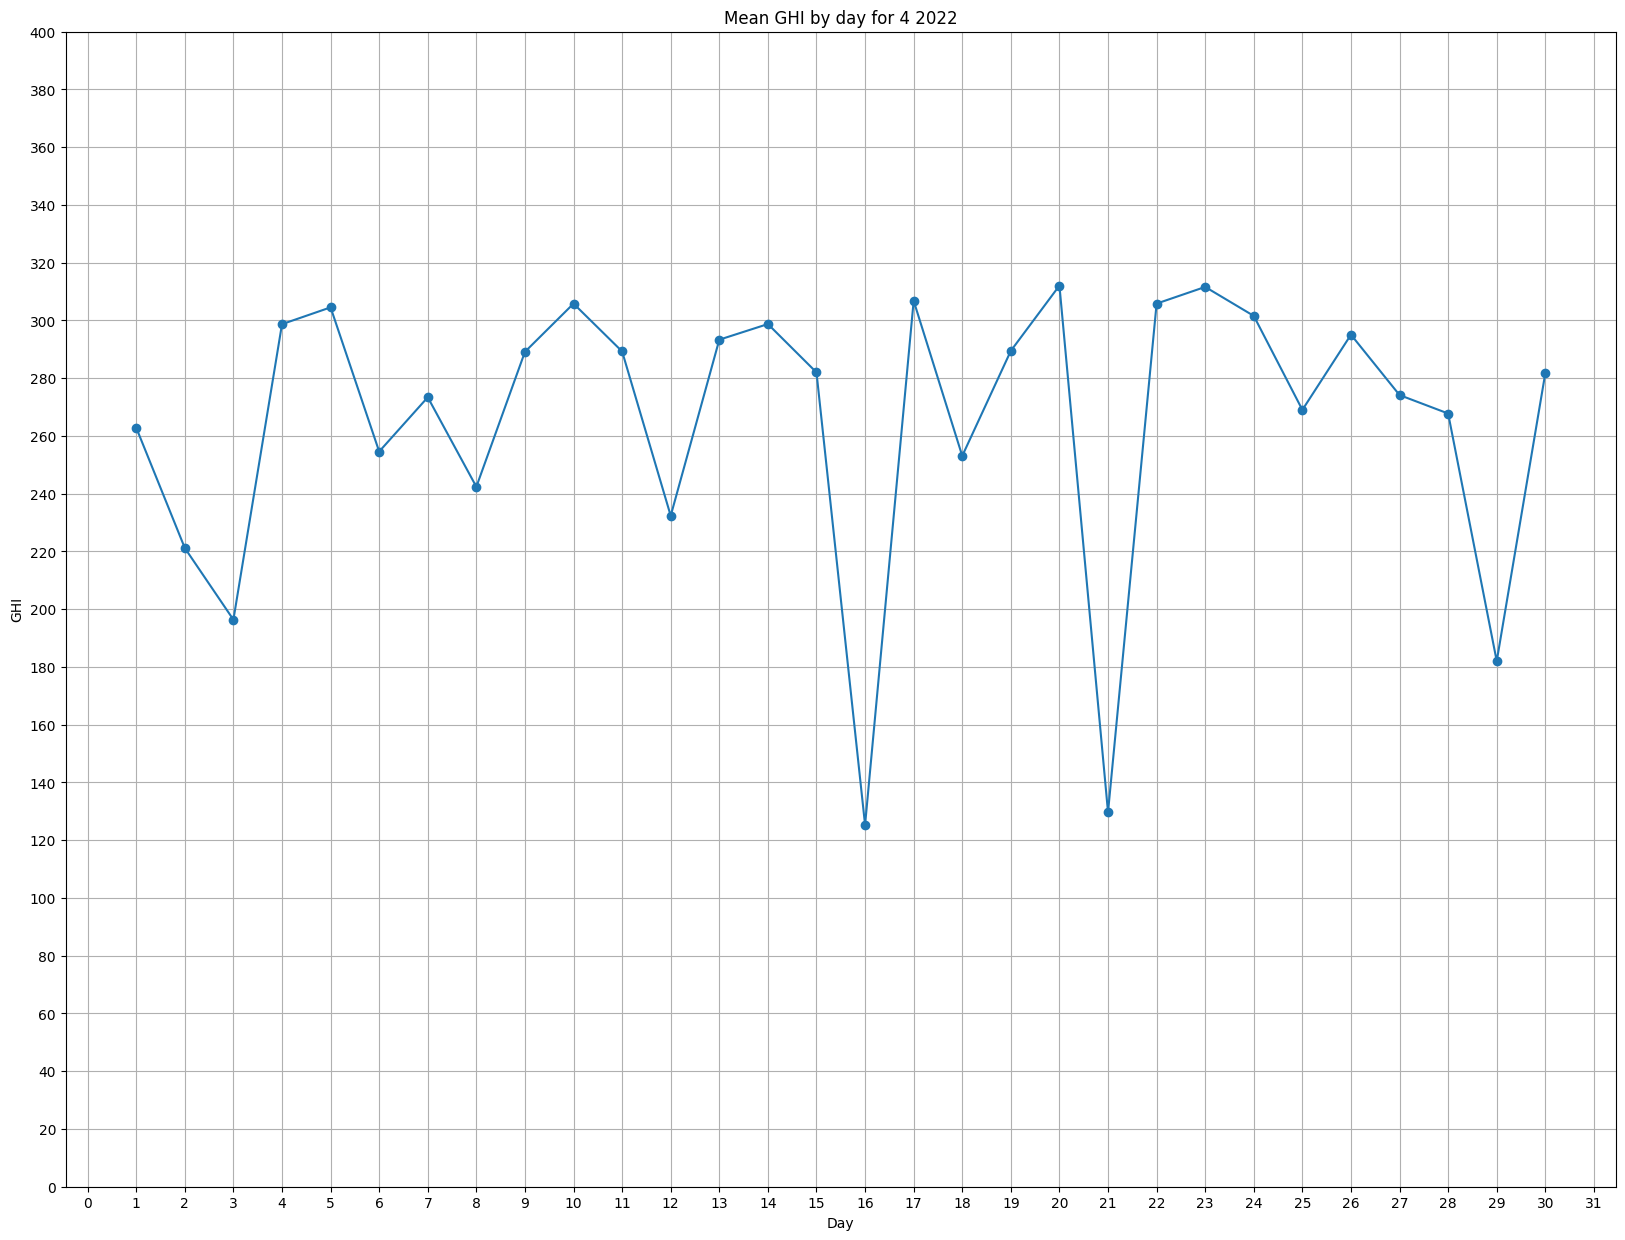

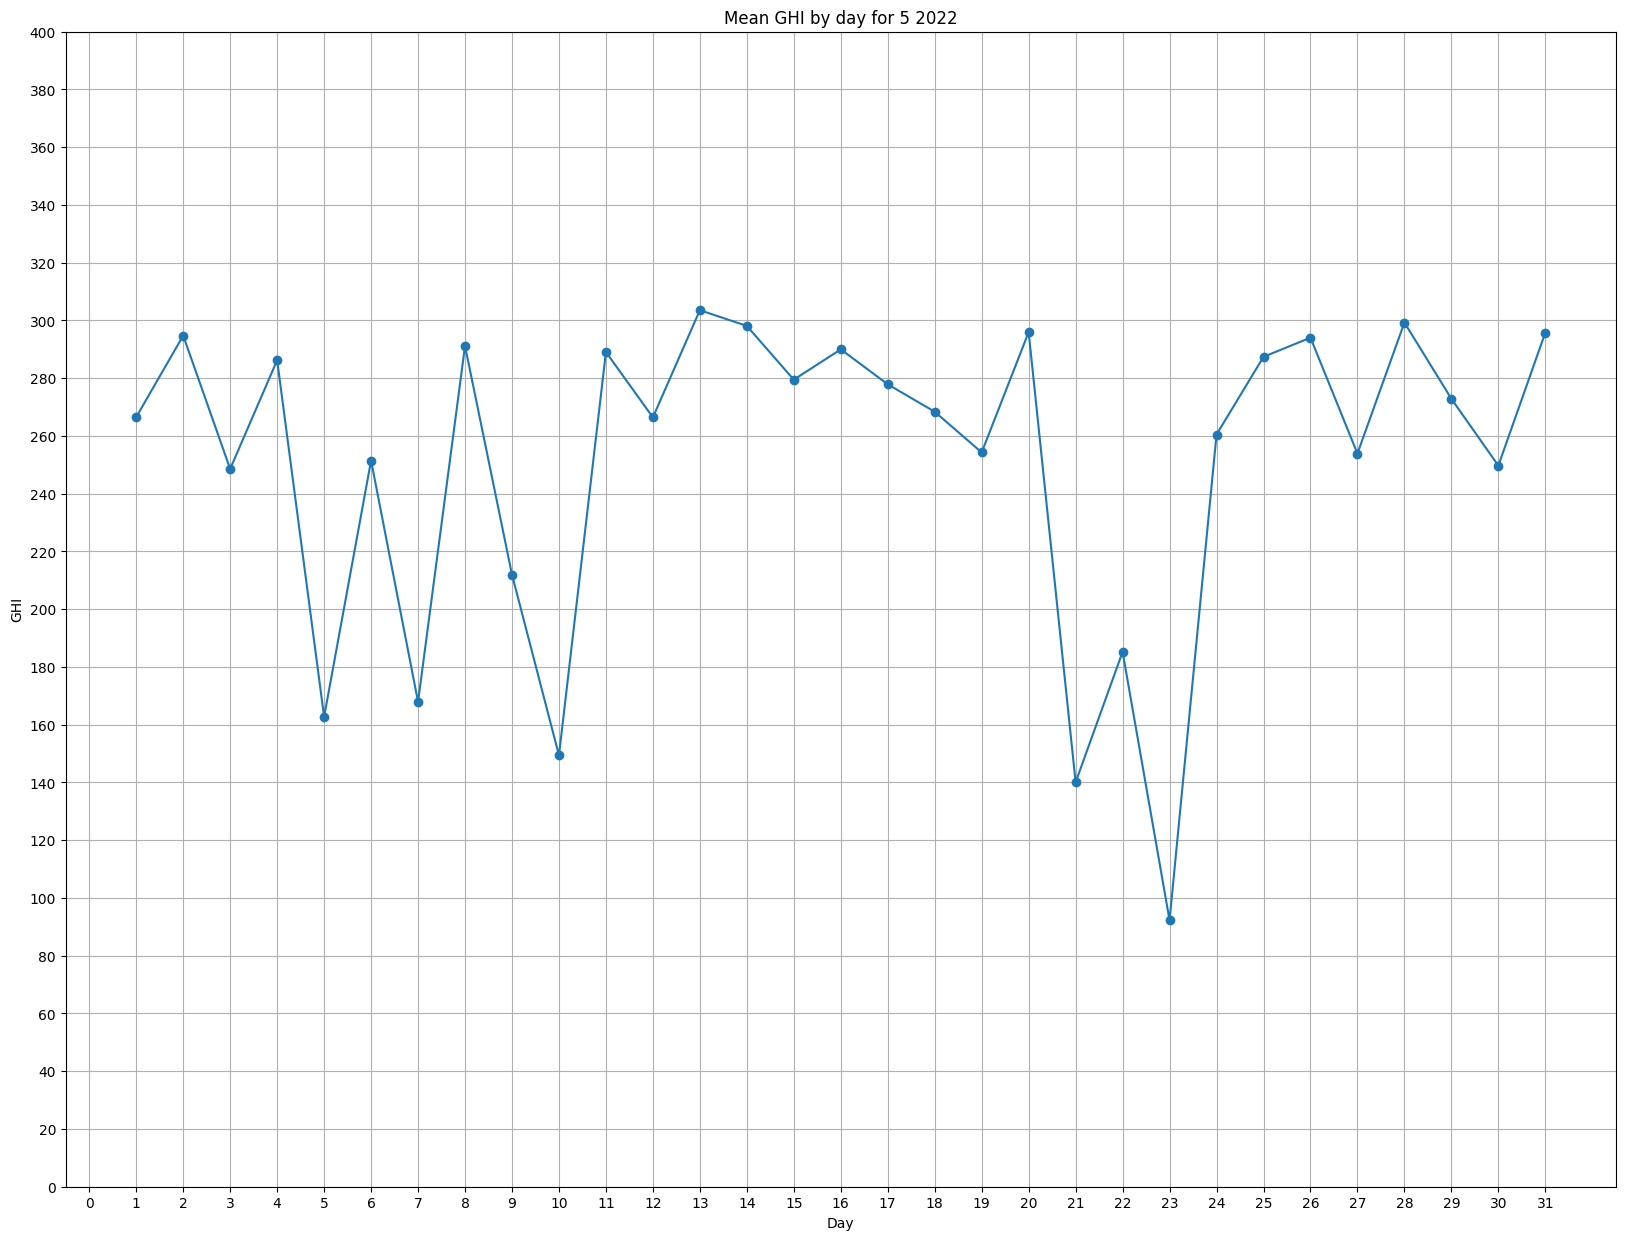

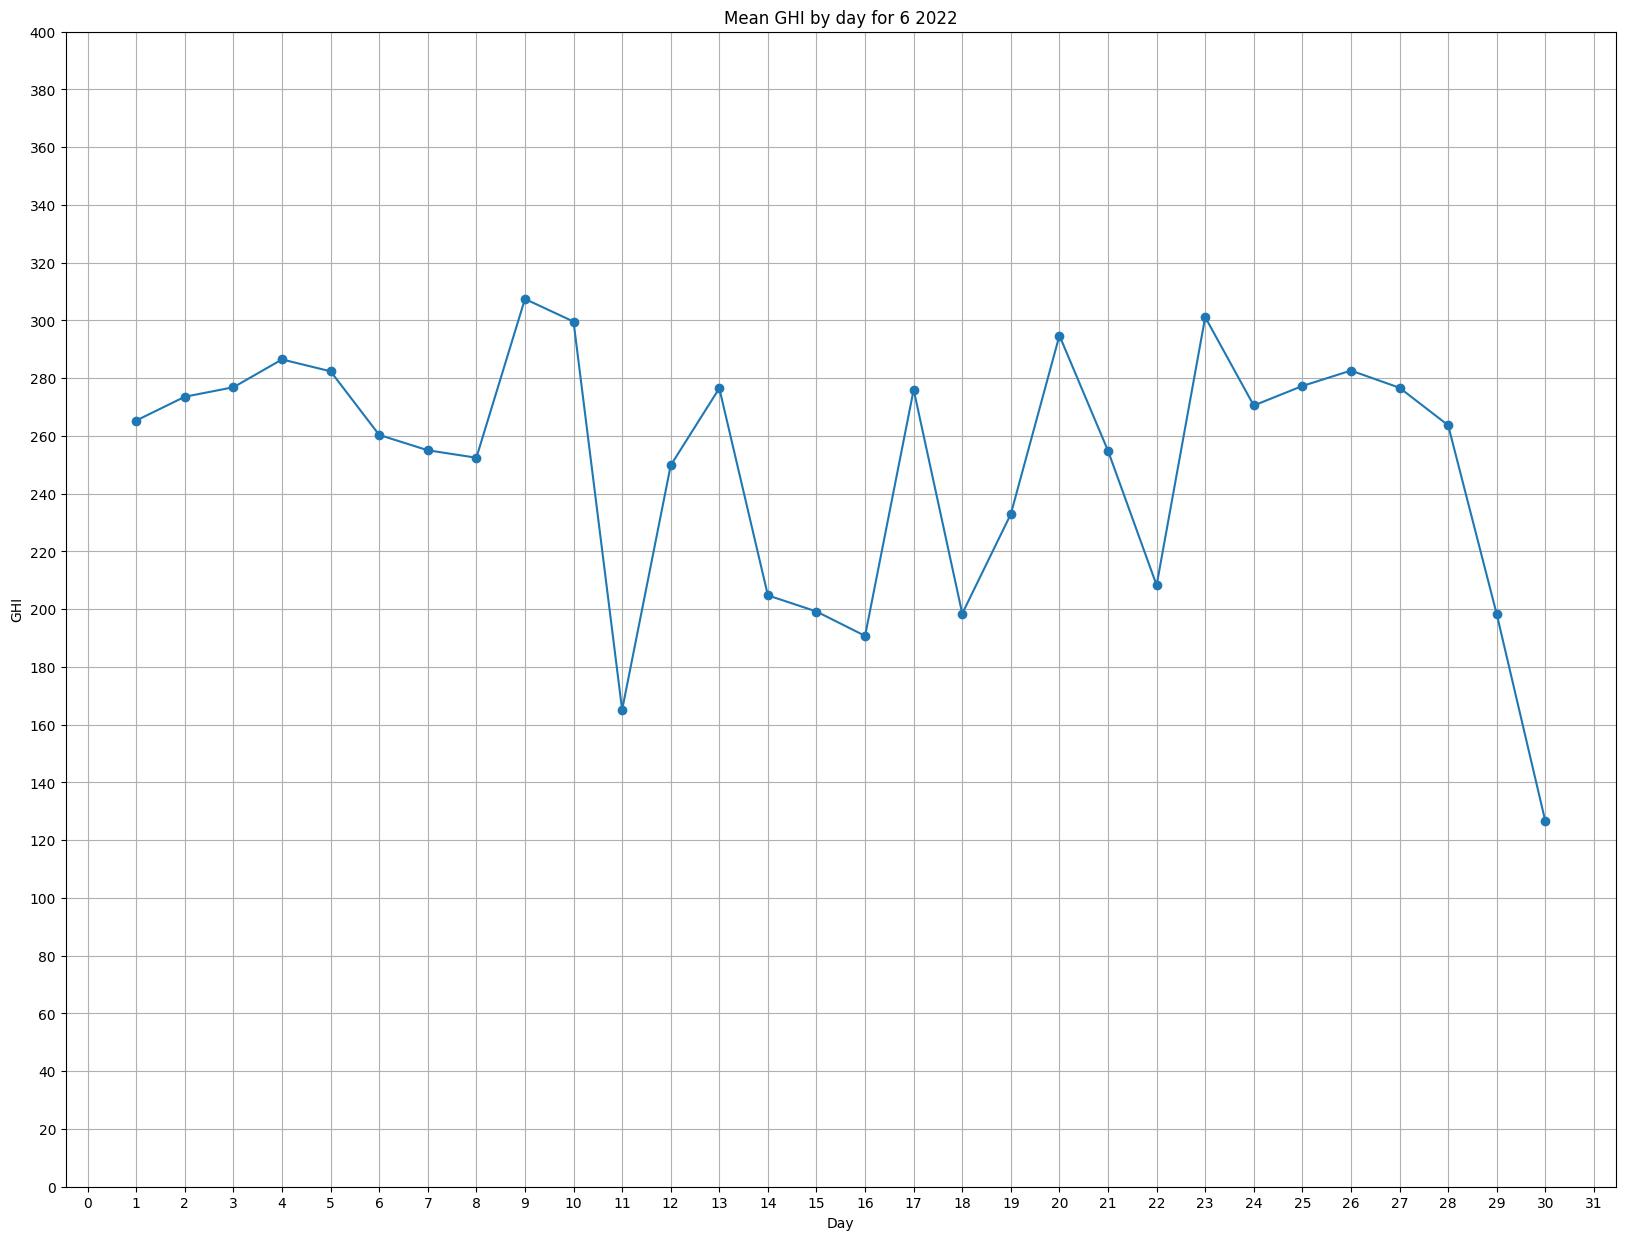

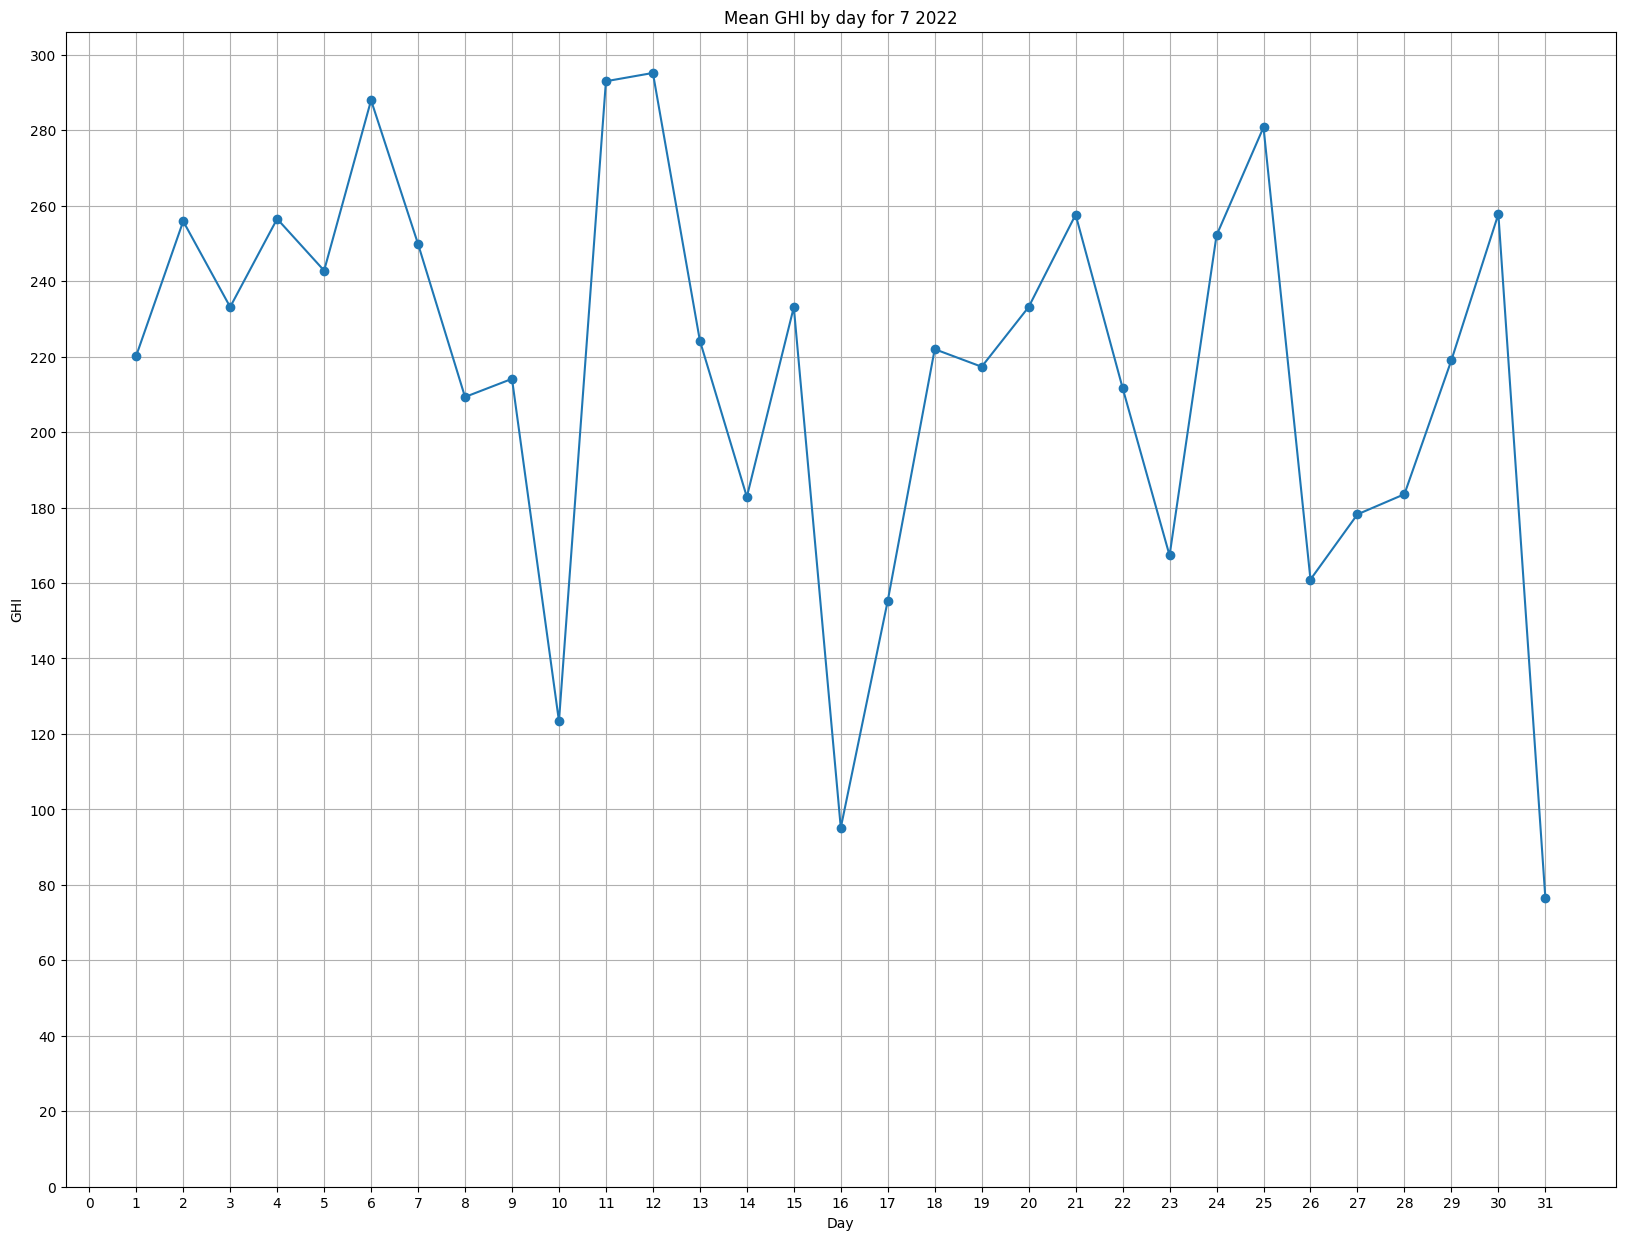

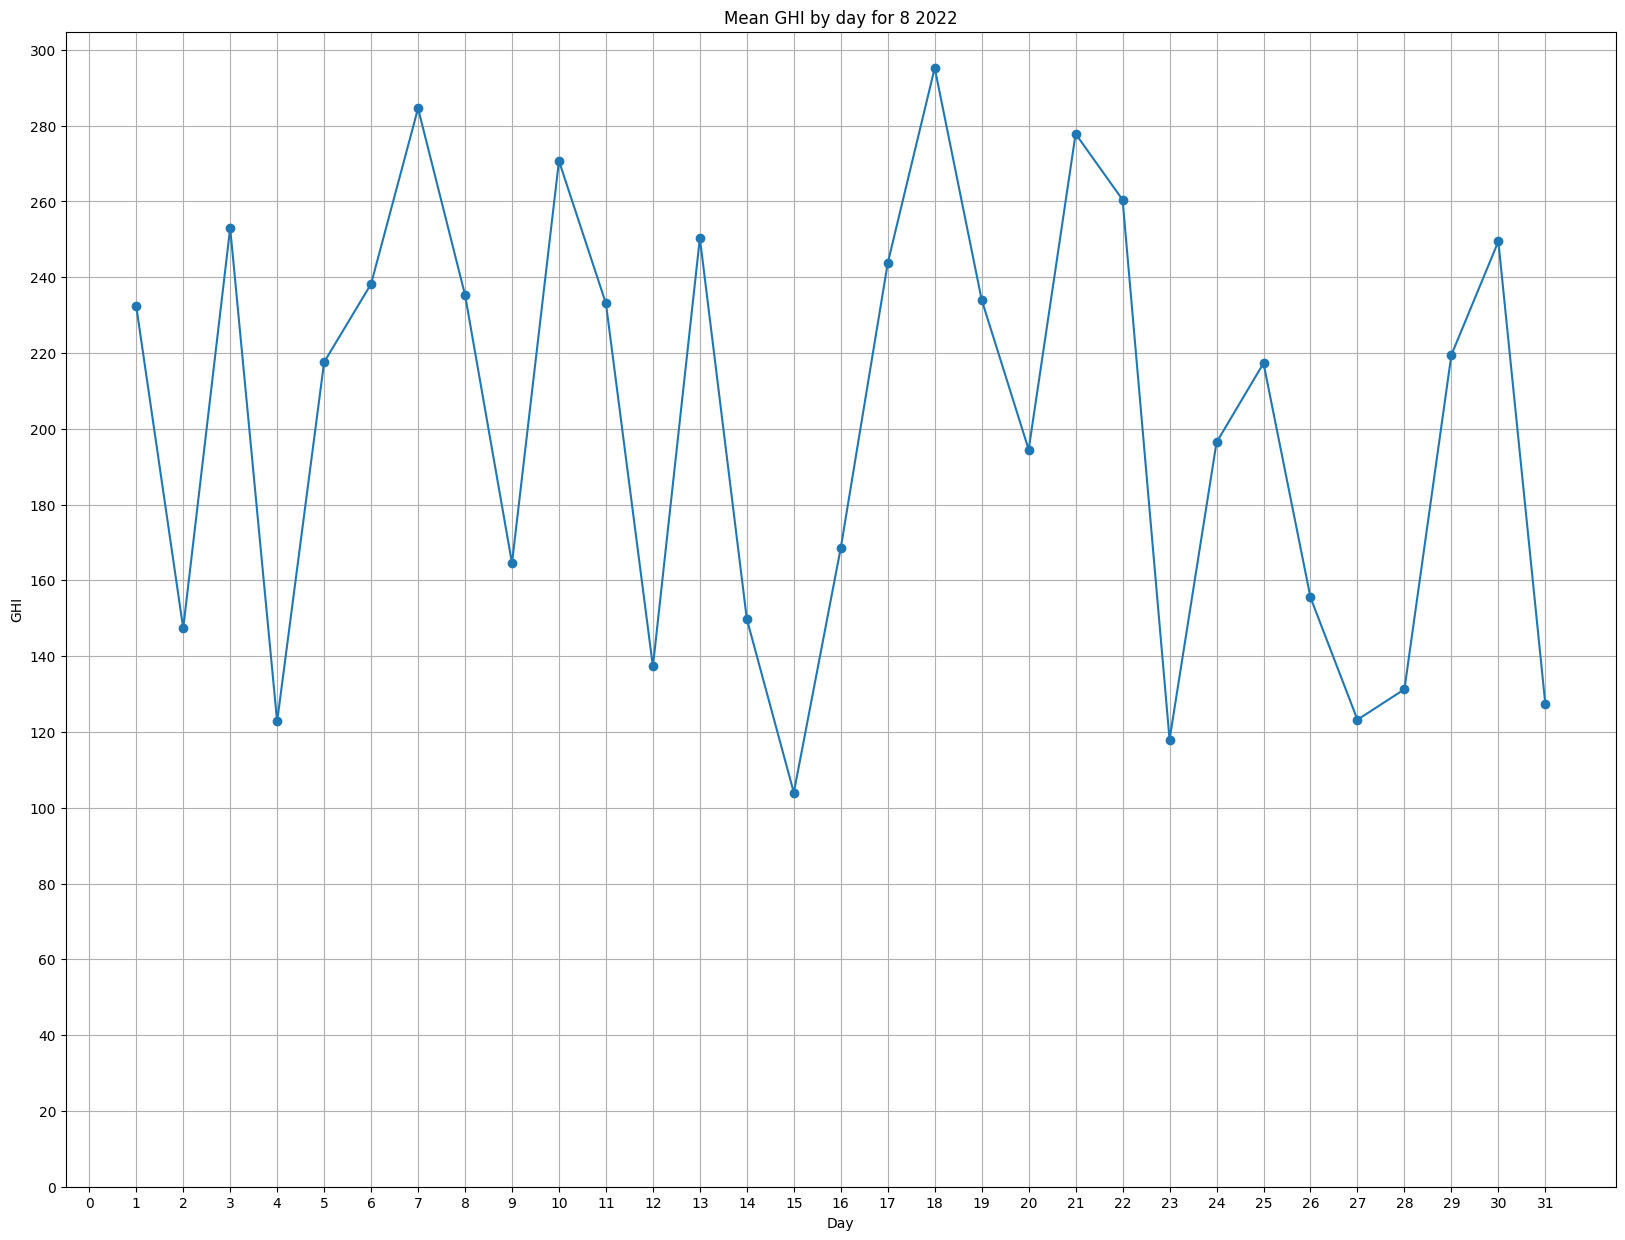

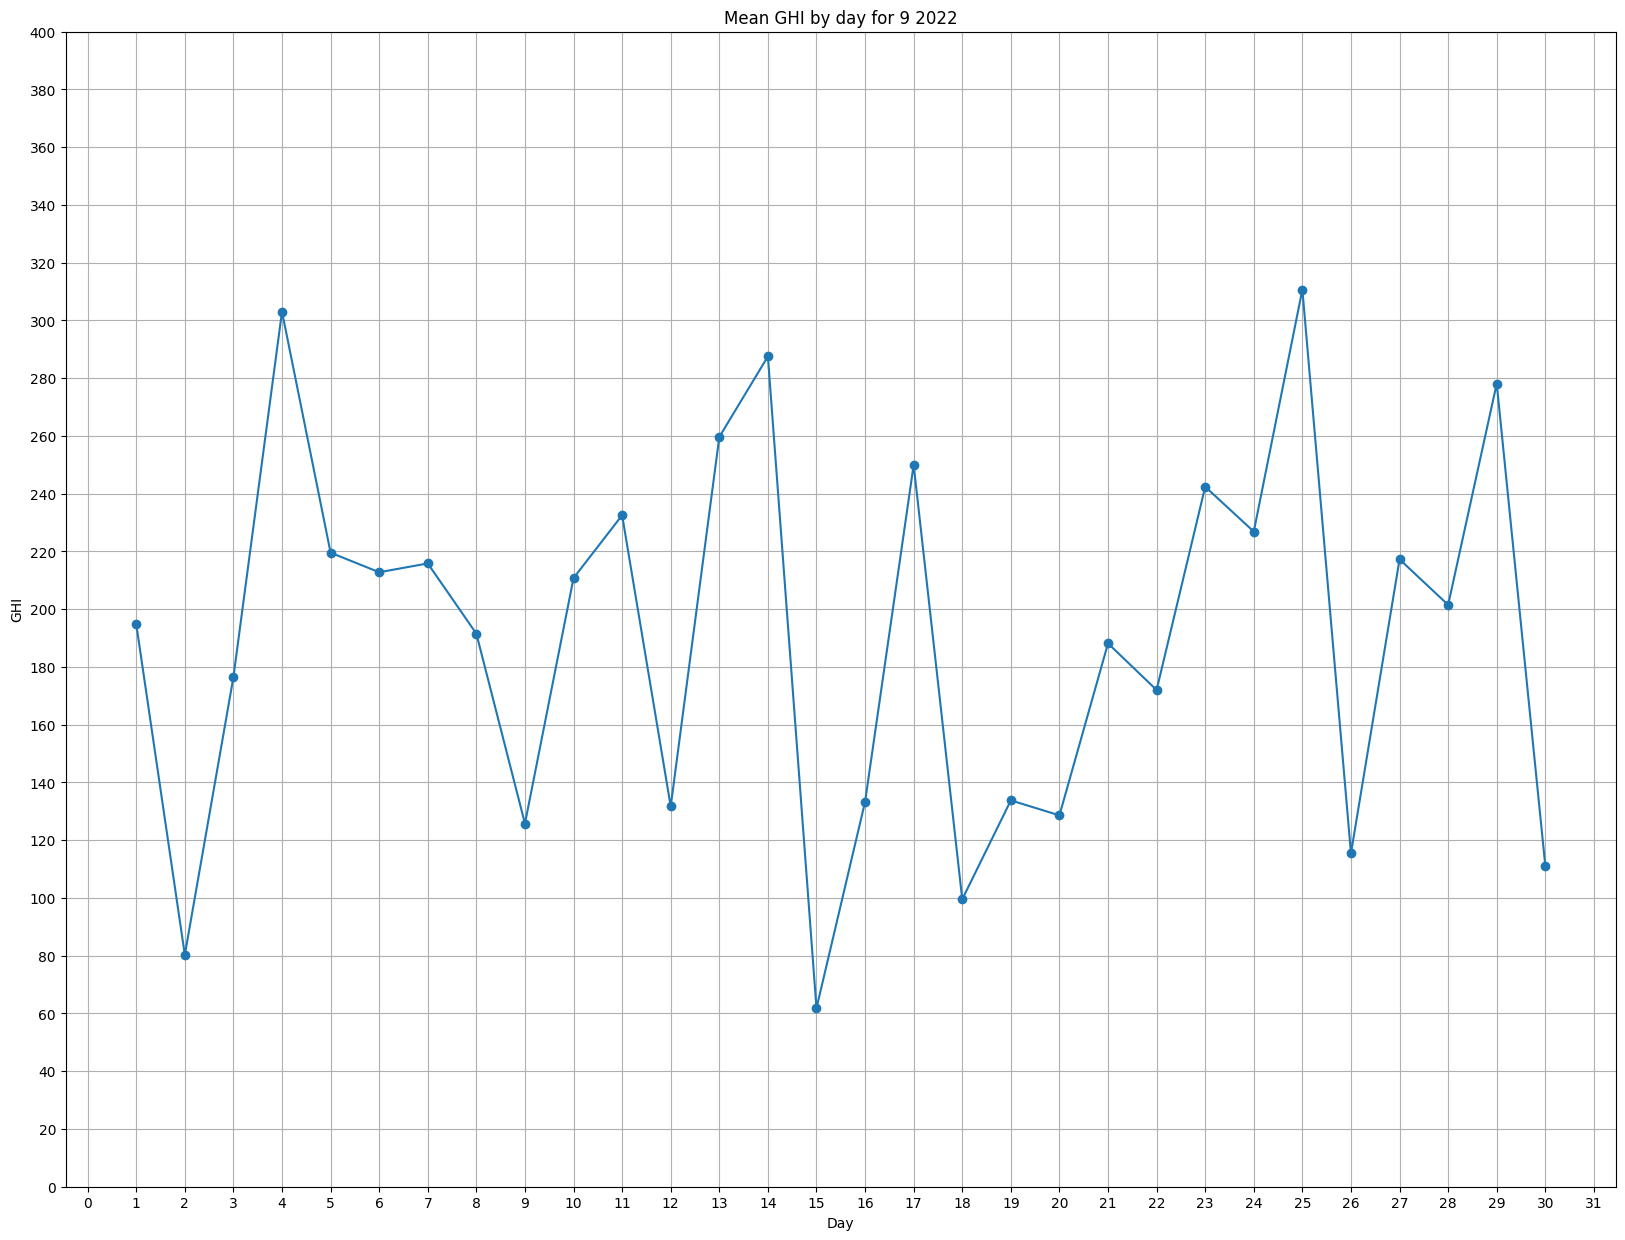

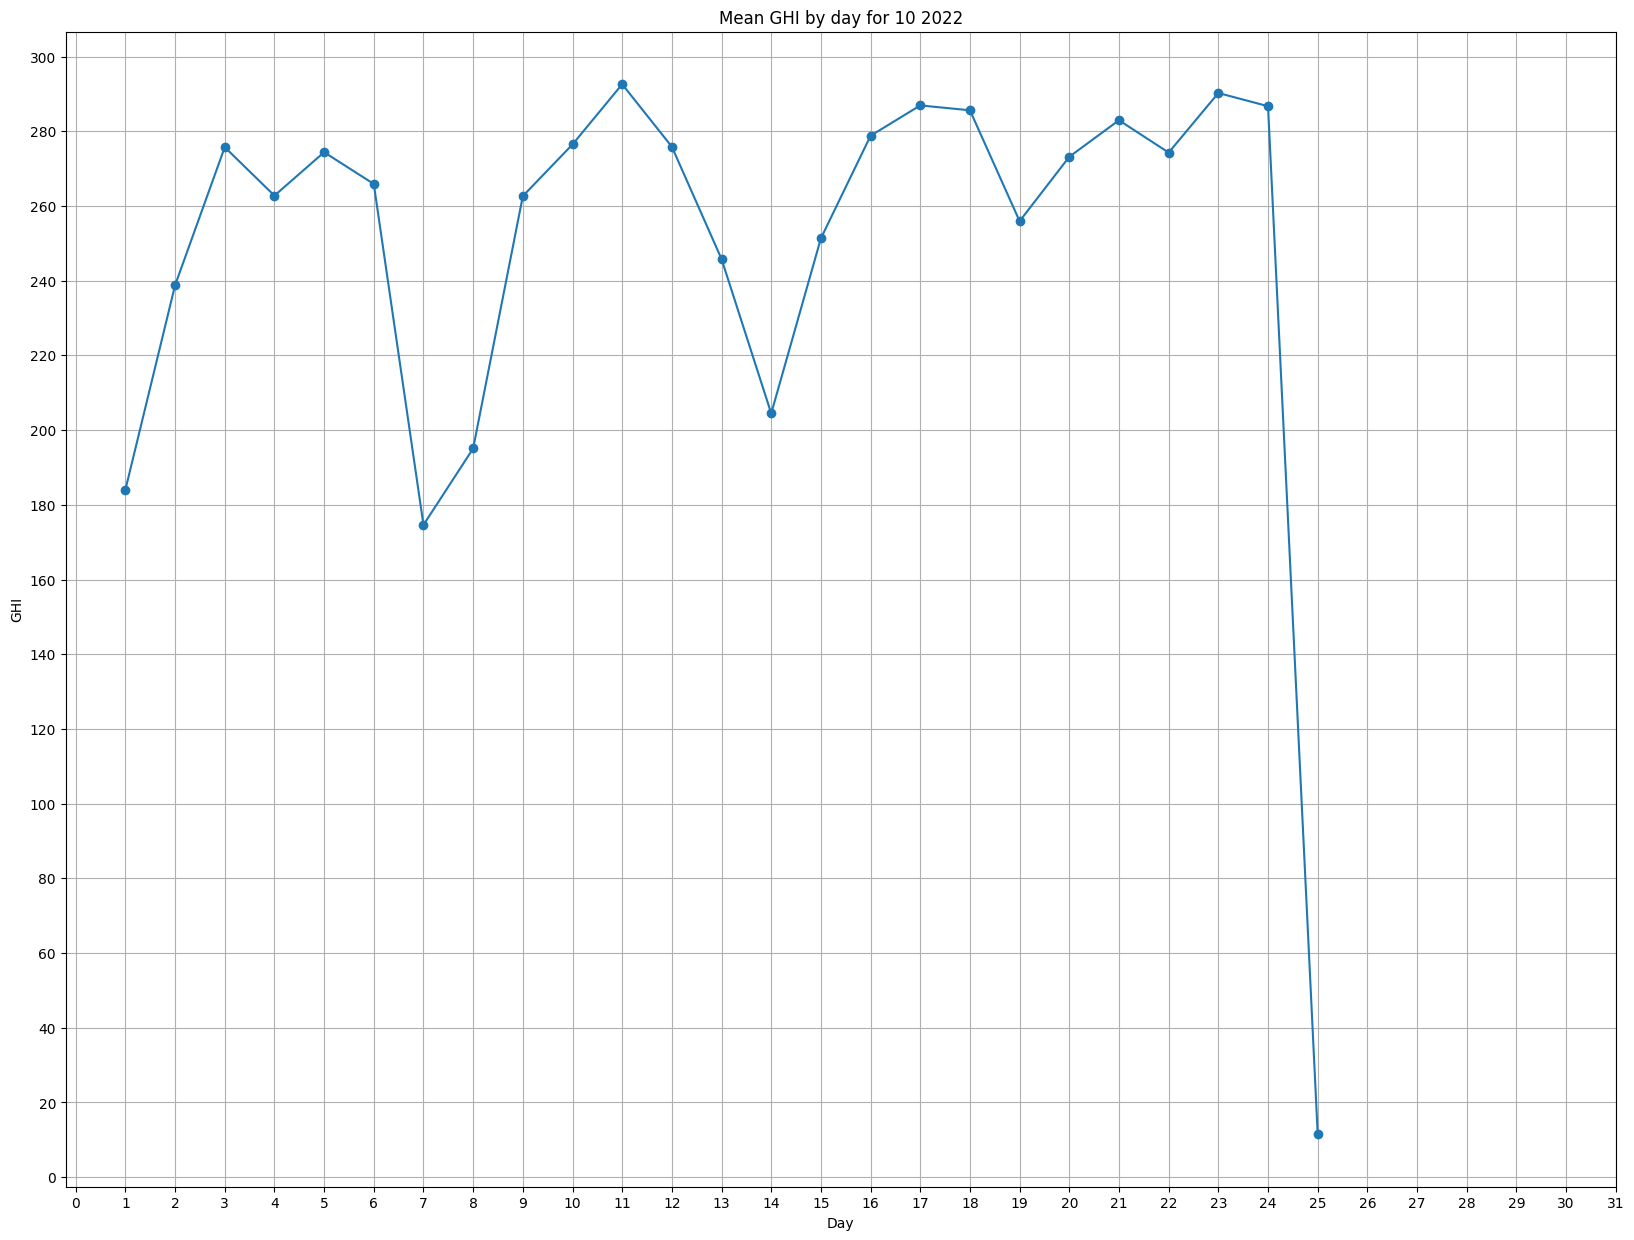

In [33]:
for idx, row in mean_ghi_by_day.iterrows():
    ymax = int(math.ceil(row.max() / 100.0)) * 100

    plt.figure(figsize=(20, 15))
    plt.grid(True)

    plt.plot(row.index, row.values, marker="o")
    plt.xticks(np.arange(0, 32, 1))
    plt.yticks(np.arange(0, ymax + 1, 20))

    plt.title(f"Mean GHI by day for {idx[0]} {idx[1]}")

    plt.xlabel("Day")
    plt.ylabel("GHI")

    plt.show()

#### Mean DNI Change Over the Month

In [34]:
dni_group = df.groupby(["Year", "Month", "Day"])["DNI"].mean().reset_index()
mean_dni_by_day = dni_group.pivot(
    index=["Month", "Year"], columns="Day", values="DNI"
).sort_values("Year")

mean_dni_by_day.head()

,Day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
Month,Year,,,,,,,,,,,,,,,,,,,,,
10,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,112.296595,242.010556,221.792222,220.968264,274.342014,238.873889,158.894583
11,2021,147.634097,240.142639,228.635972,232.310972,213.693403,135.365903,277.422847,272.855139,223.520347,251.929861,...,292.332569,306.931042,302.192292,284.372431,301.021389,302.863472,324.429236,272.023194,237.270486,NaN
12,2021,250.362014,226.732708,180.288542,119.425556,158.891667,201.350000,134.043264,241.691736,222.231528,166.541389,...,124.327083,299.326250,246.541736,231.661597,251.821319,267.561250,268.912569,251.296736,322.544861,268.997500
1,2022,284.996319,257.765556,1.283264,34.778819,172.170903,174.013542,154.854236,185.320556,271.514653,218.691111,...,183.856389,310.890972,308.475347,266.444444,308.504722,241.999028,47.856597,89.459722,256.612778,291.005972
2,2022,261.769514,335.232569,191.411319,165.767917,138.113125,59.196597,50.923819,99.919931,124.856458,269.099375,...,108.960625,138.907569,185.772292,207.648403,162.517292,142.018333,127.740208,NaN,NaN,NaN


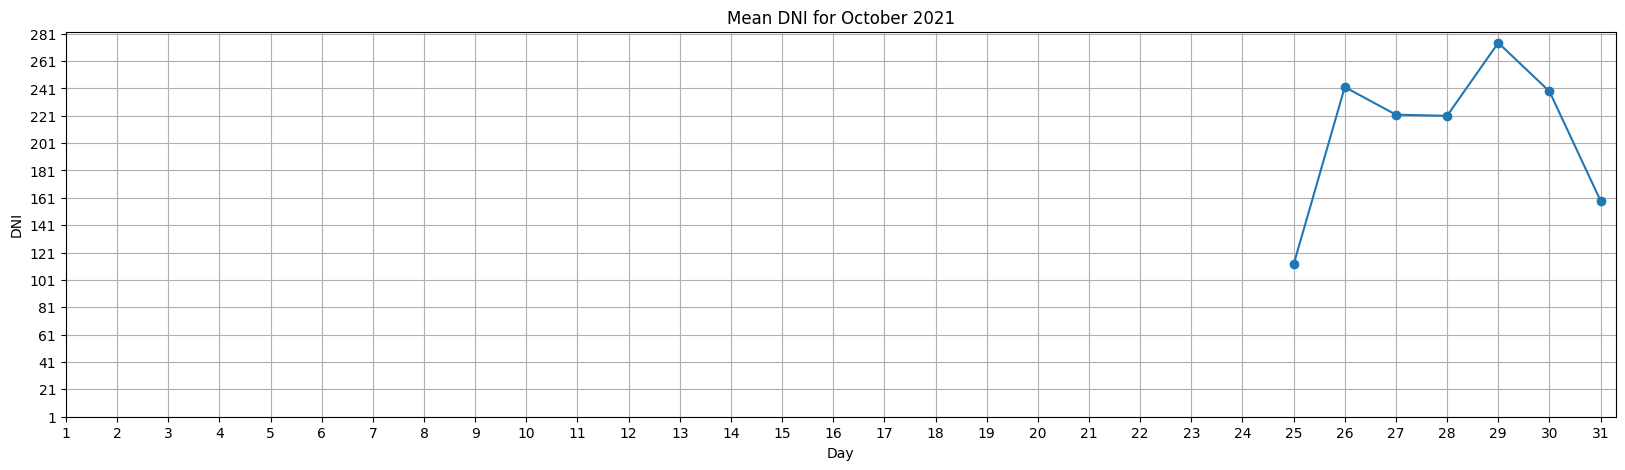

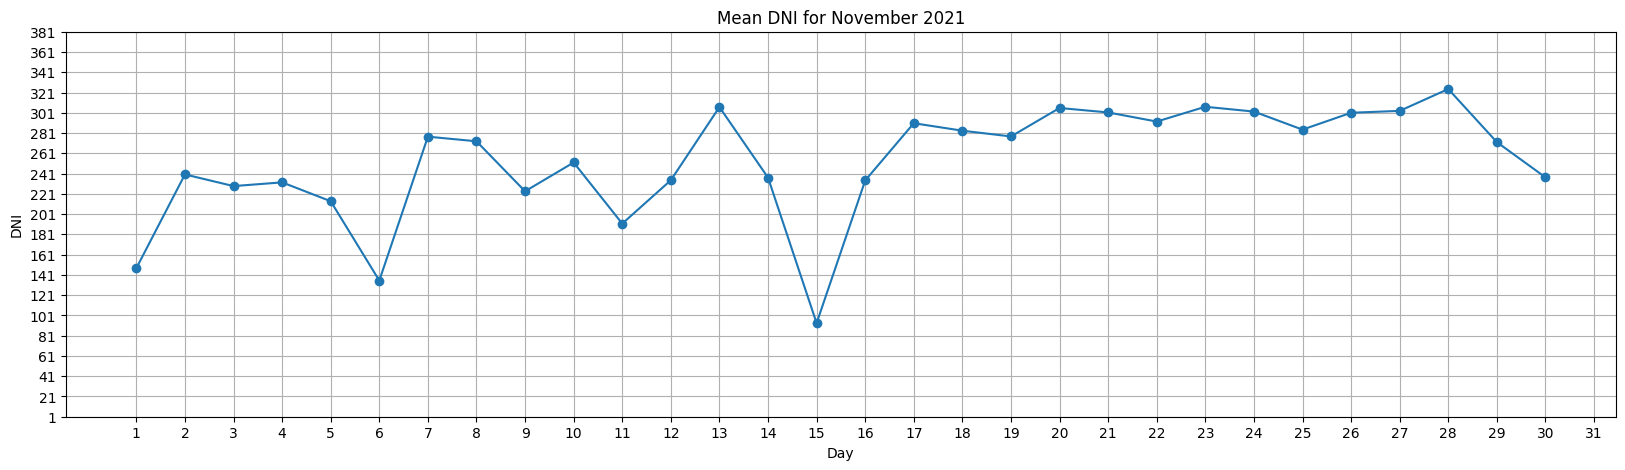

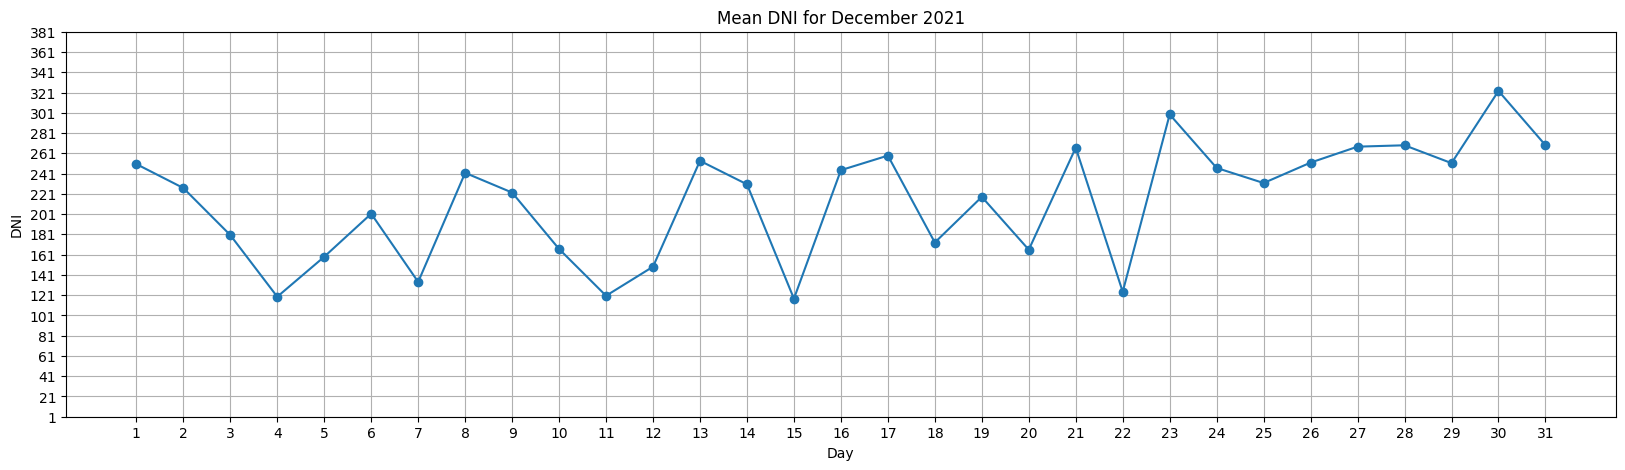

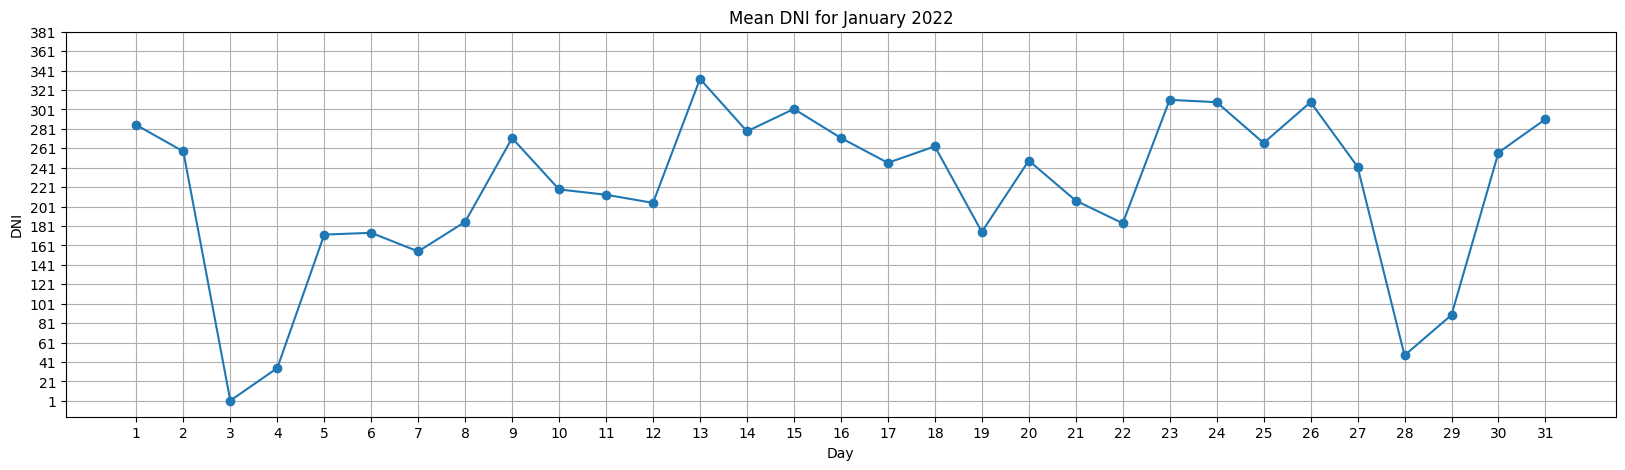

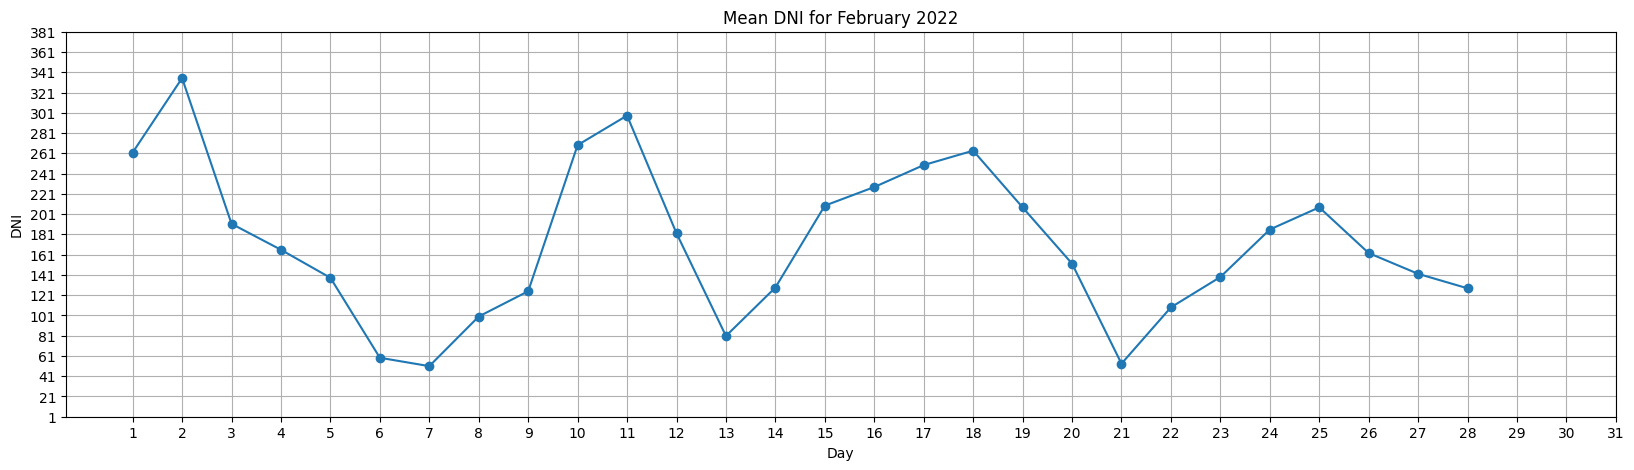

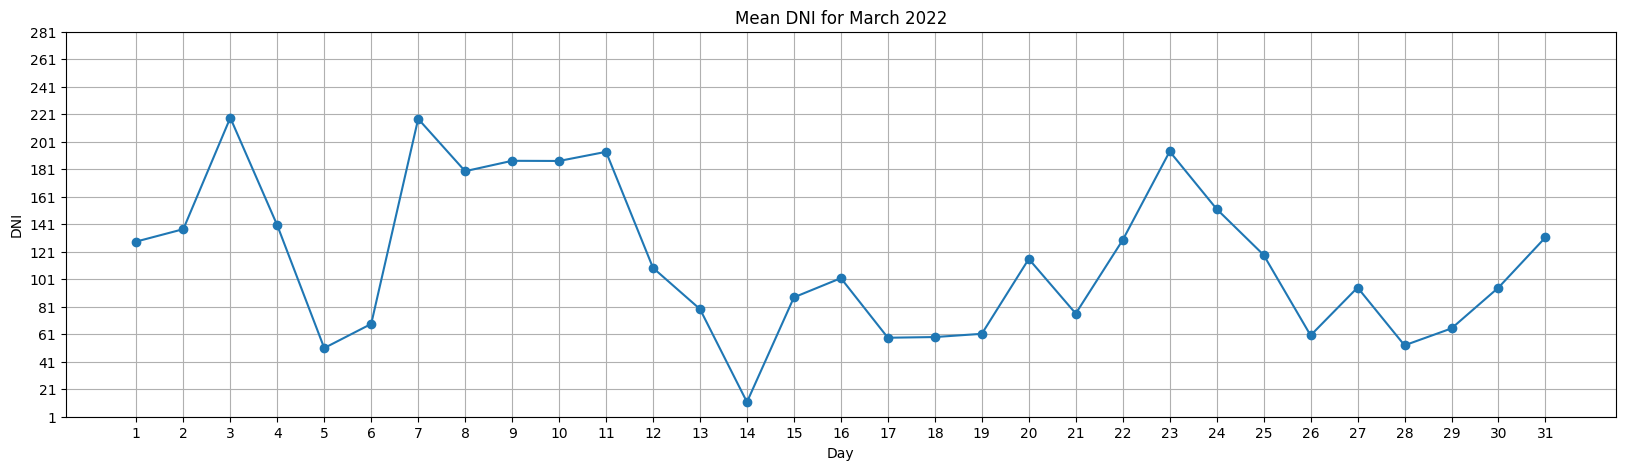

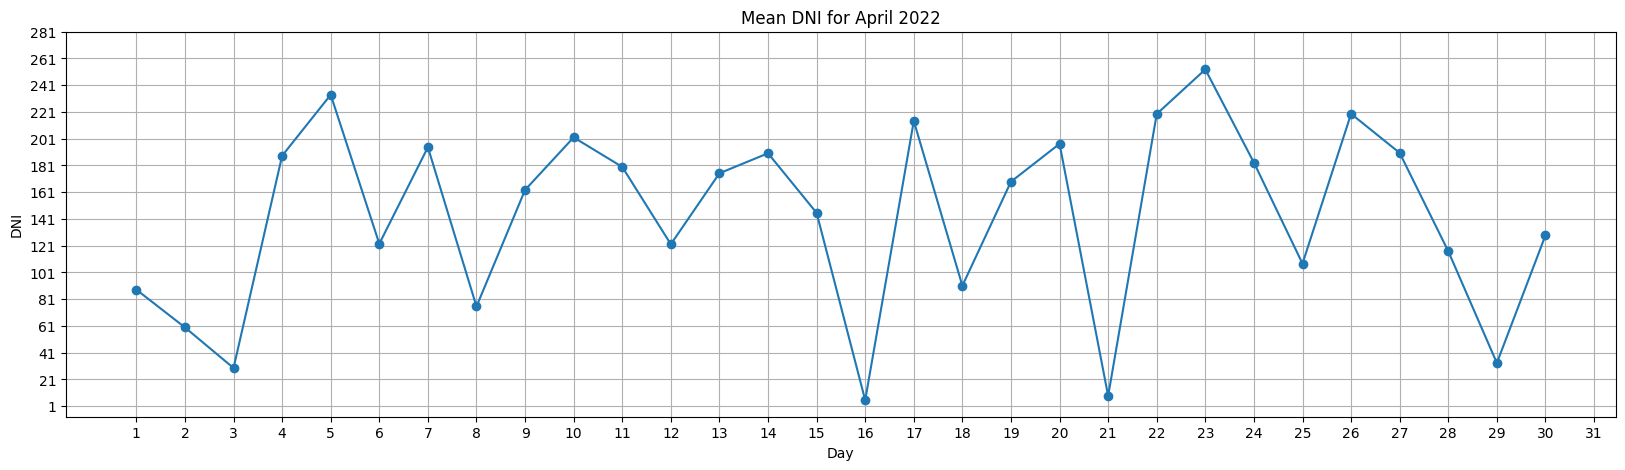

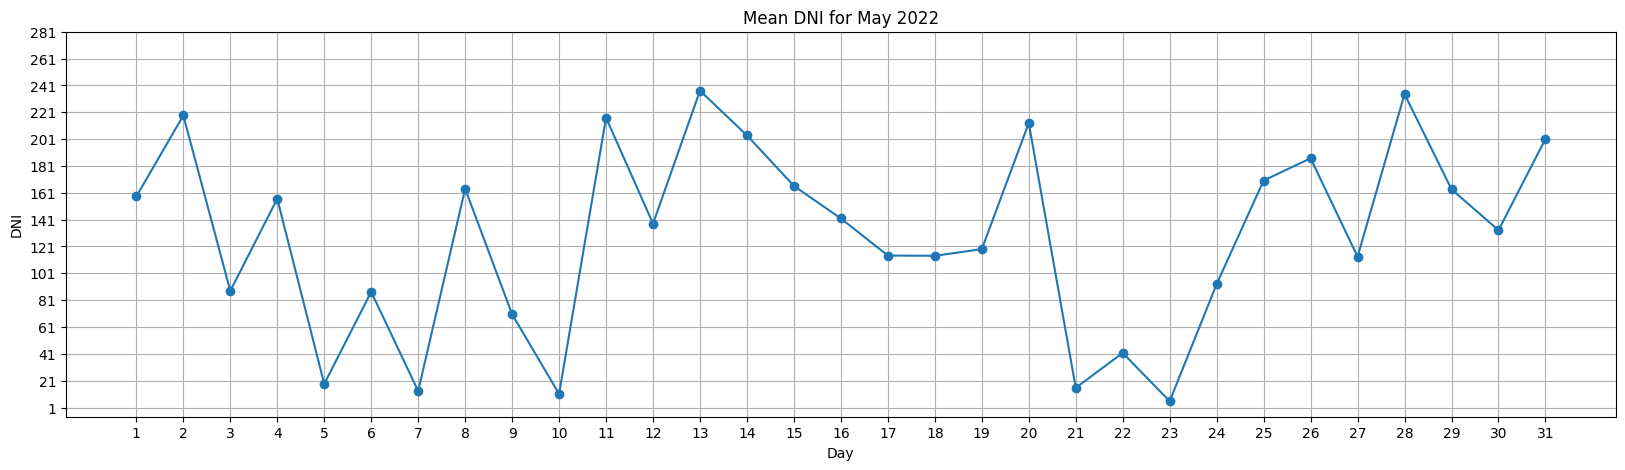

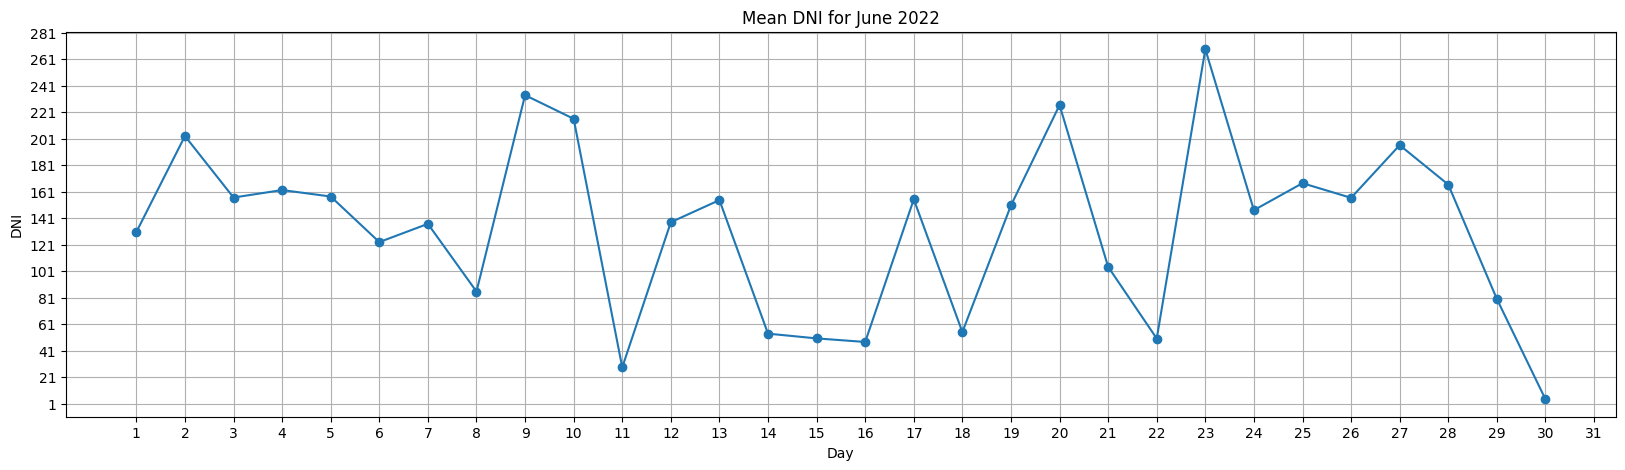

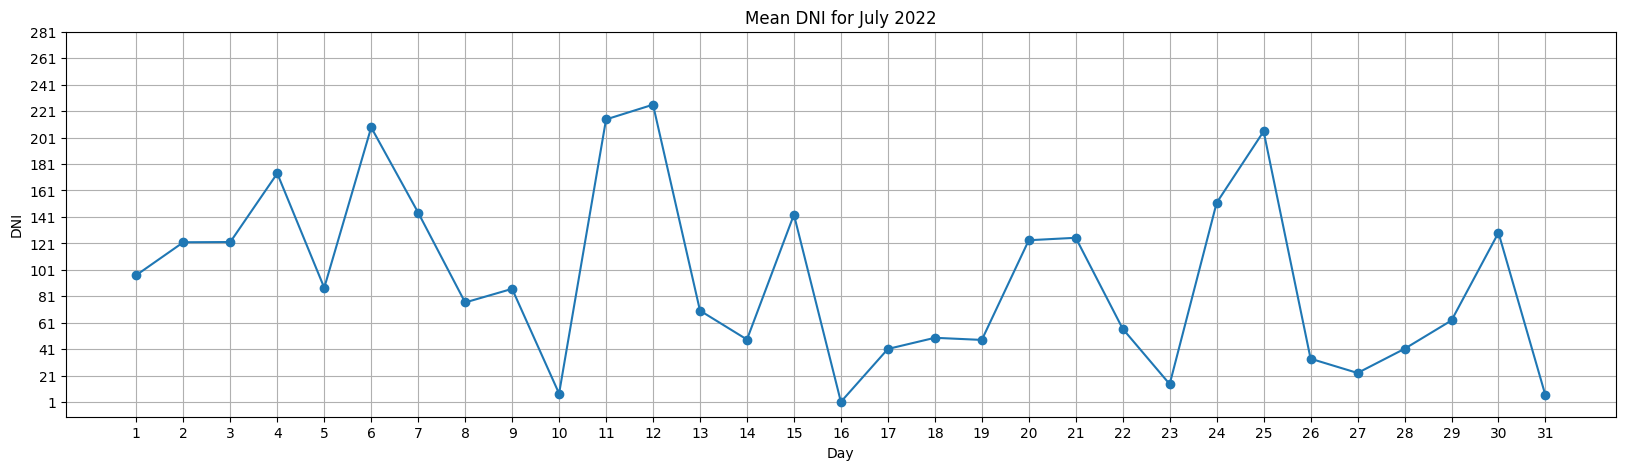

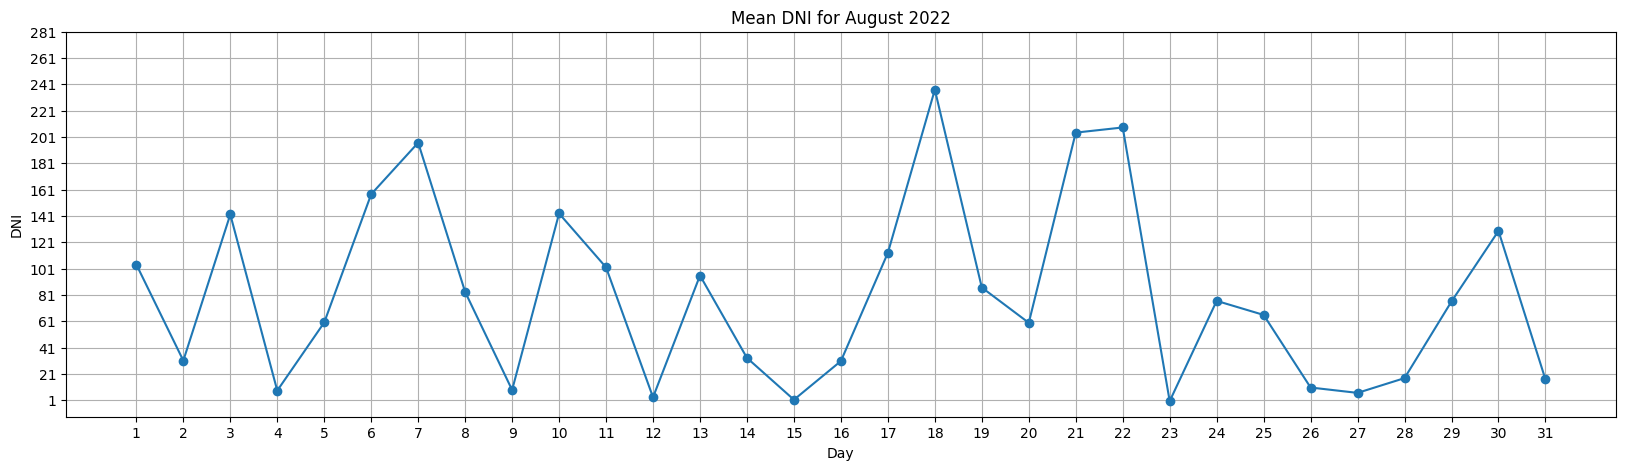

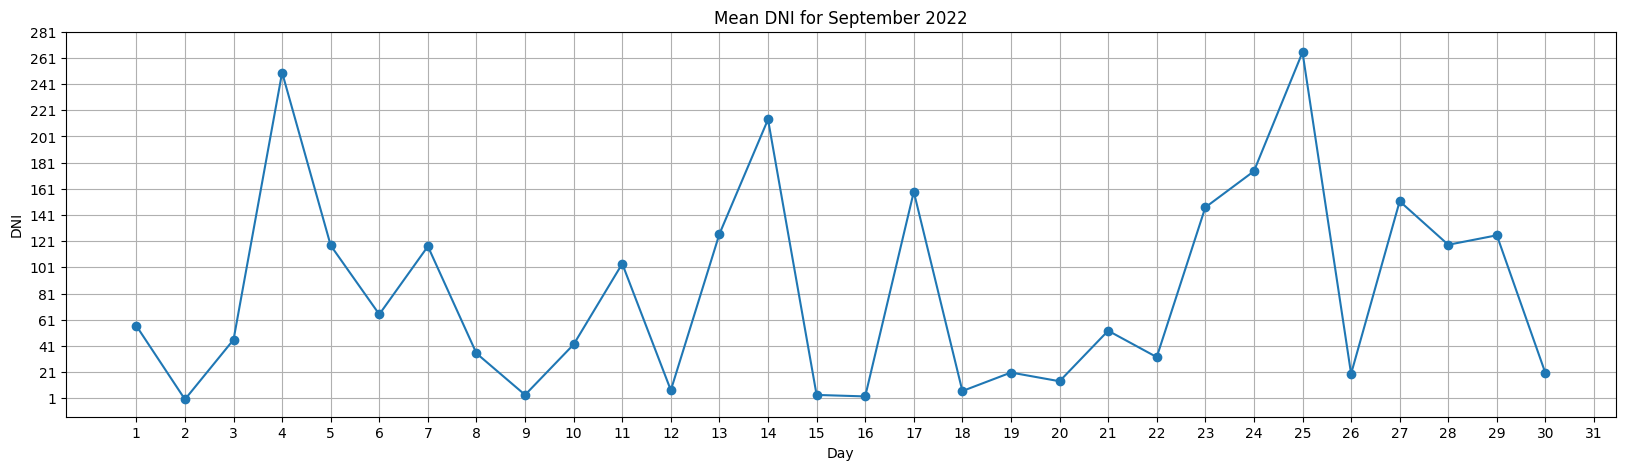

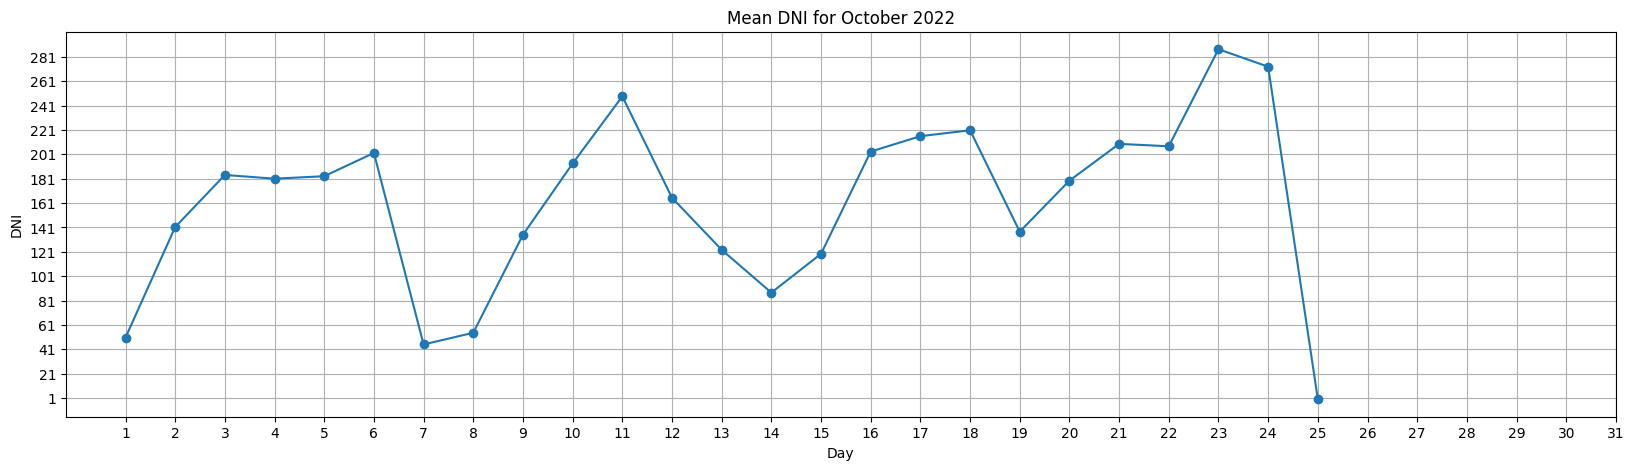

In [35]:
for index, row in mean_dni_by_day.iterrows():
    ymax = int(math.ceil(row.max() / 100)) * 100

    plt.figure(figsize=(20, 5))
    plt.grid(True)

    plt.plot(row.index, row.values, marker="o")

    plt.xticks(ticks=np.arange(1, 32, step=1))
    plt.yticks(ticks=np.arange(1, ymax + 1, step=20))

    plt.title(f"Mean DNI for {months[index[0]]} {index[1]}")

    plt.xlabel("Day")
    plt.ylabel("DNI")

    plt.show()

In [36]:
dhi_group = df.groupby(["Year", "Month", "Day"])["DHI"].mean().reset_index()
mean_dhi_by_day = dhi_group.pivot(
    index=["Month", "Year"], columns="Day", values="DHI"
).sort_values("Year")

mean_dhi_by_day.head()

,Day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
Month,Year,,,,,,,,,,,,,,,,,,,,,
10,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,139.759833,98.657778,100.251389,104.538333,79.688333,92.248542,110.822222
11,2021,120.359097,88.634375,97.697222,91.644444,84.638750,145.312292,67.976875,67.402014,87.505347,73.211458,...,59.176042,59.918264,53.838194,53.807569,52.106667,55.625625,48.819306,64.487986,84.315000,NaN
12,2021,69.666181,87.963750,106.147014,138.125208,121.042292,90.380417,112.458056,85.692222,95.228750,114.531667,...,134.225556,57.902431,67.090417,75.028750,74.456528,69.894444,68.382361,73.520972,45.652847,64.228958
1,2022,58.732778,69.197153,95.221806,142.649861,105.874861,105.766250,112.100208,95.648403,63.312986,84.542708,...,125.253611,57.797292,58.263333,76.839931,63.754861,81.182917,168.832639,159.228264,89.617014,75.412292
2,2022,93.430347,62.093056,130.394722,129.602986,137.584444,175.598056,178.669861,168.703681,157.063472,86.017569,...,177.798194,160.332292,128.149514,118.157847,147.835694,135.729028,132.502292,NaN,NaN,NaN


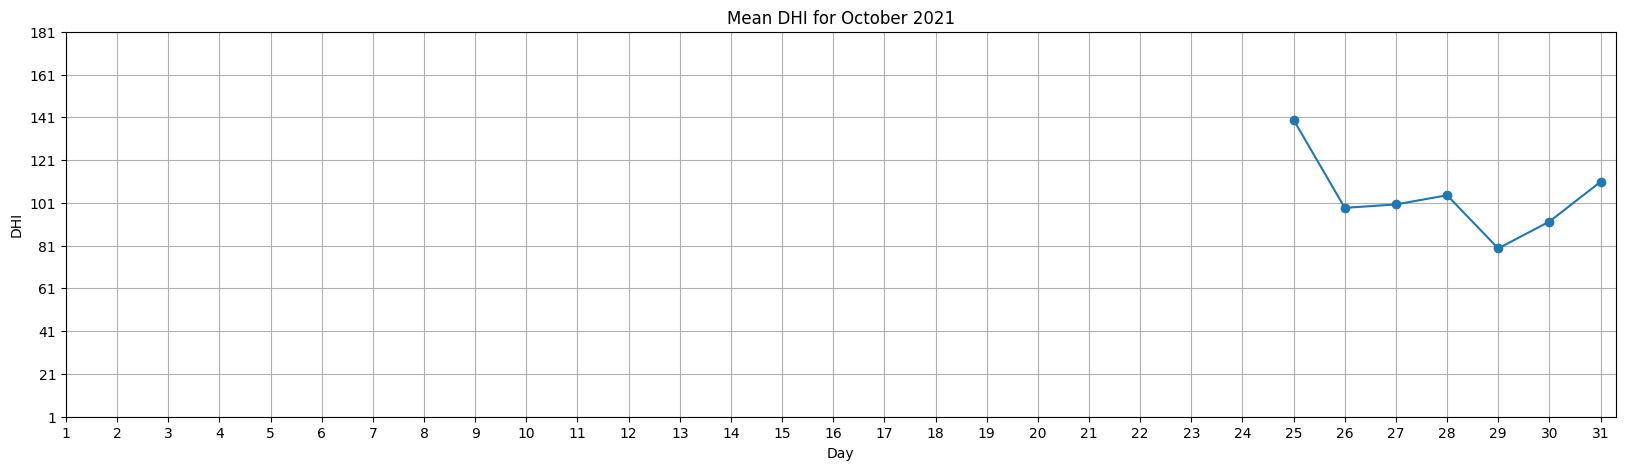

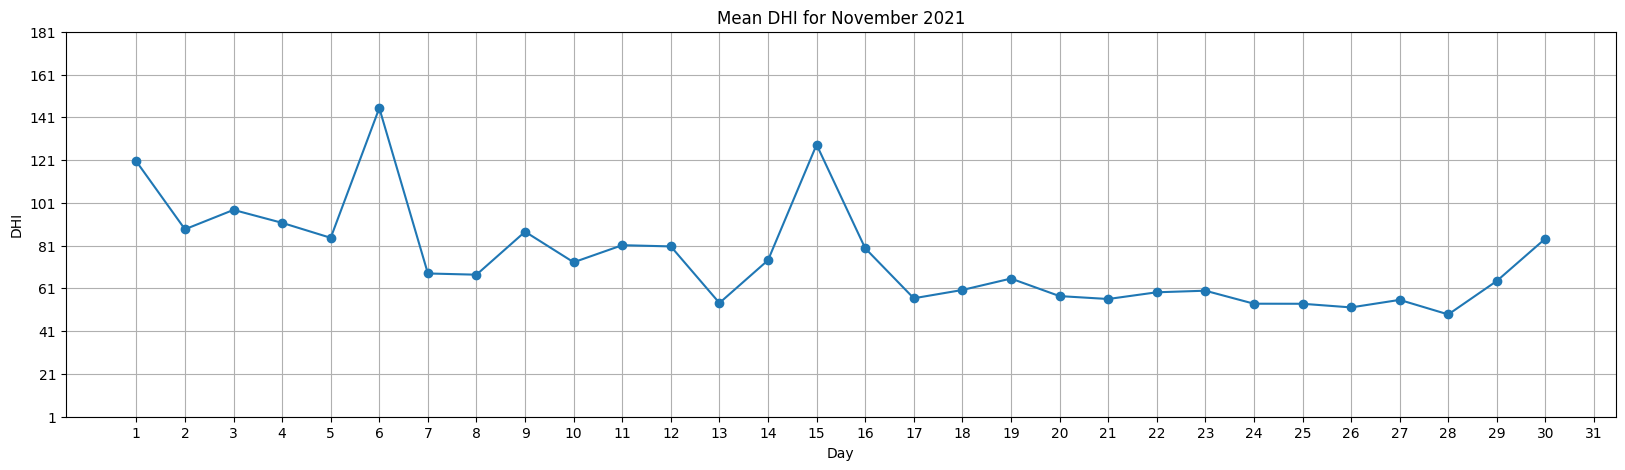

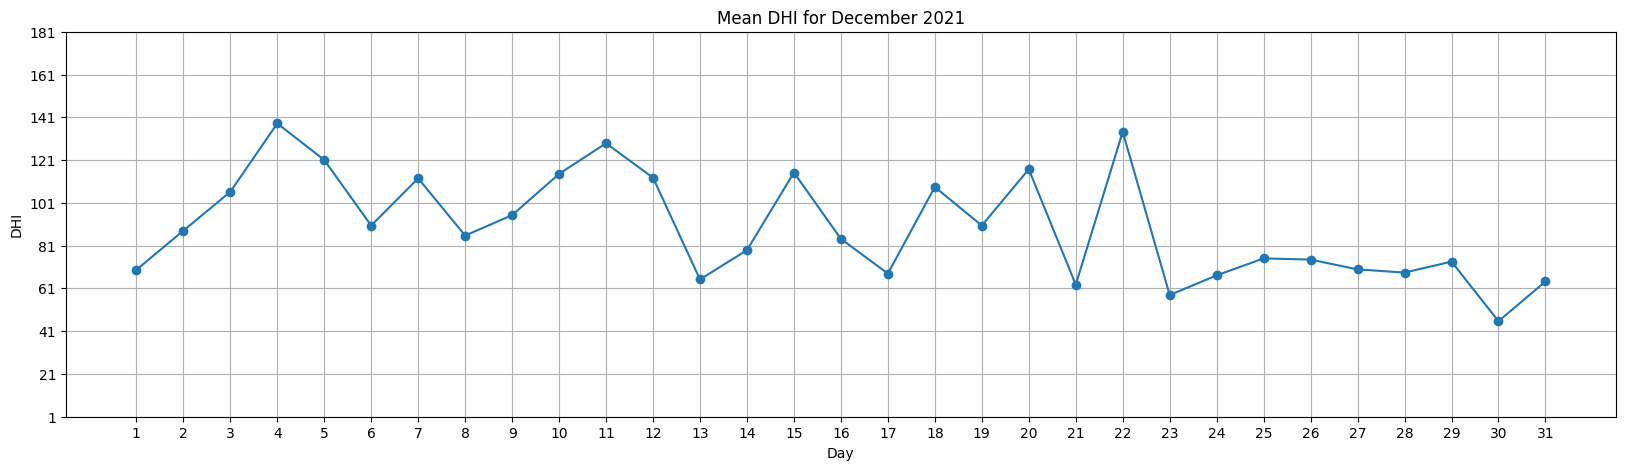

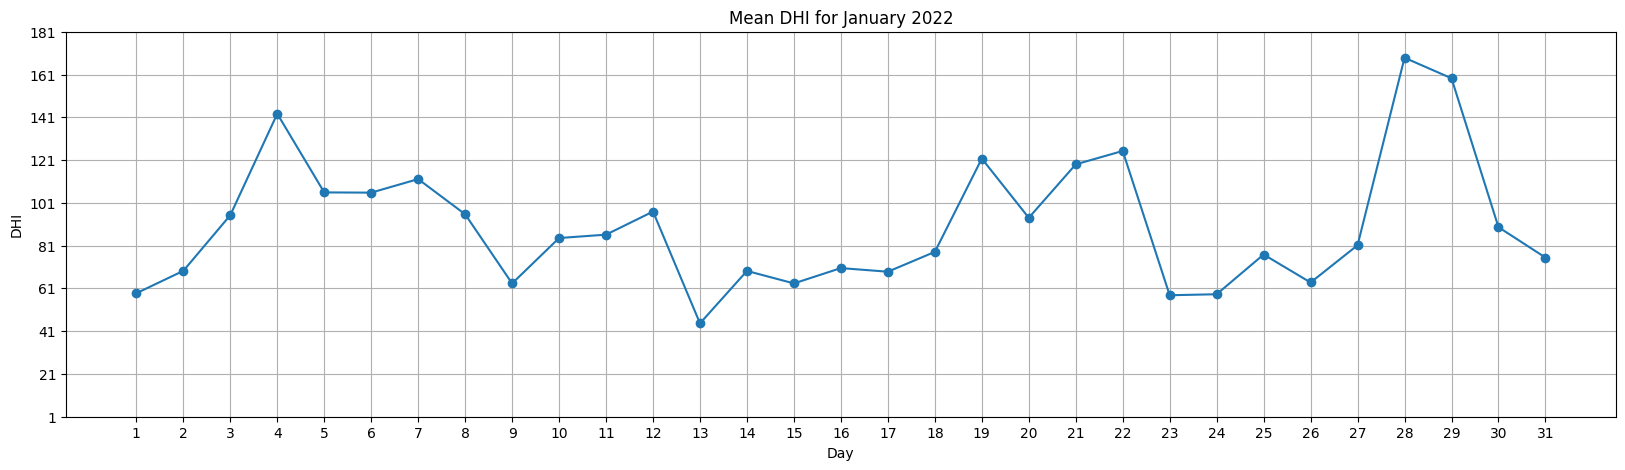

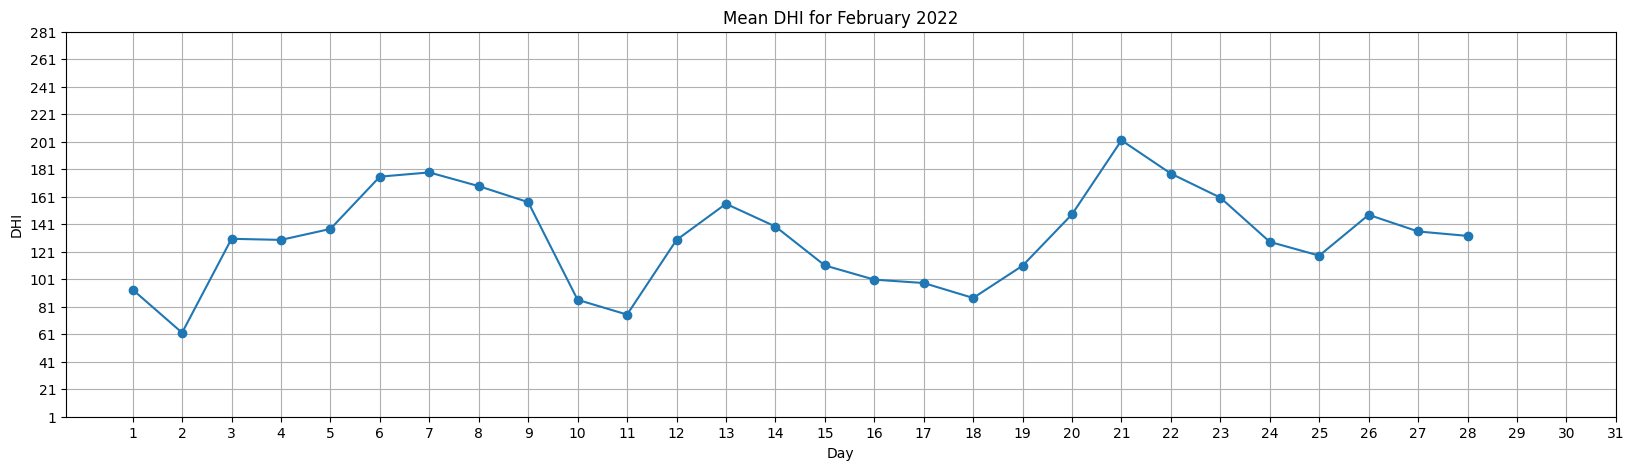

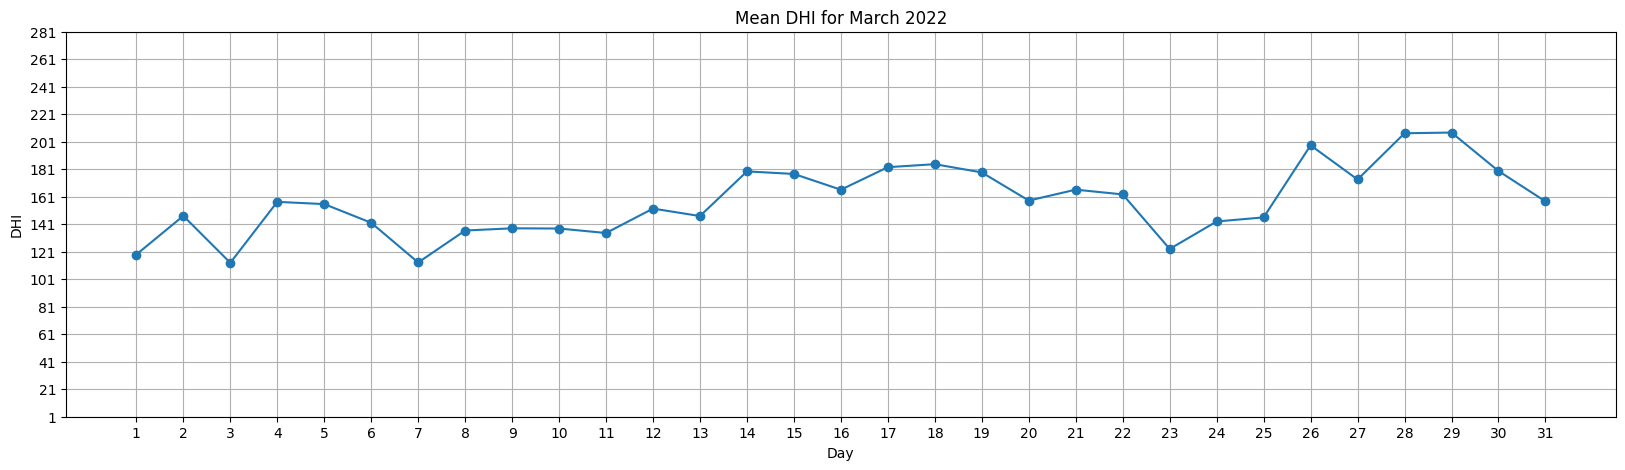

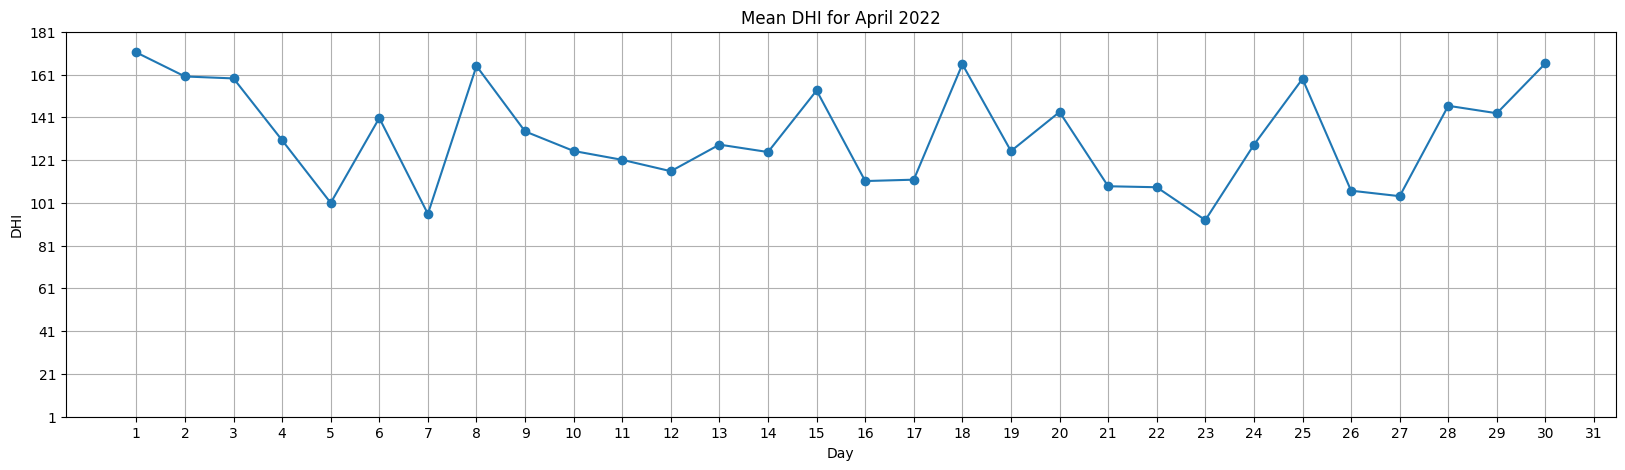

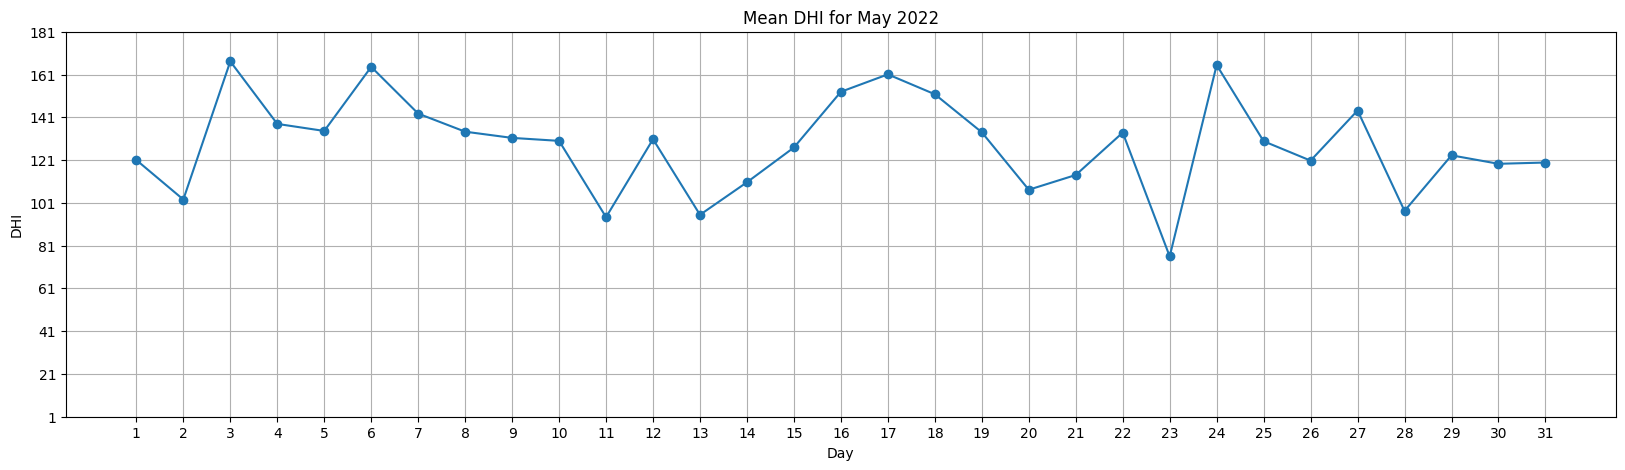

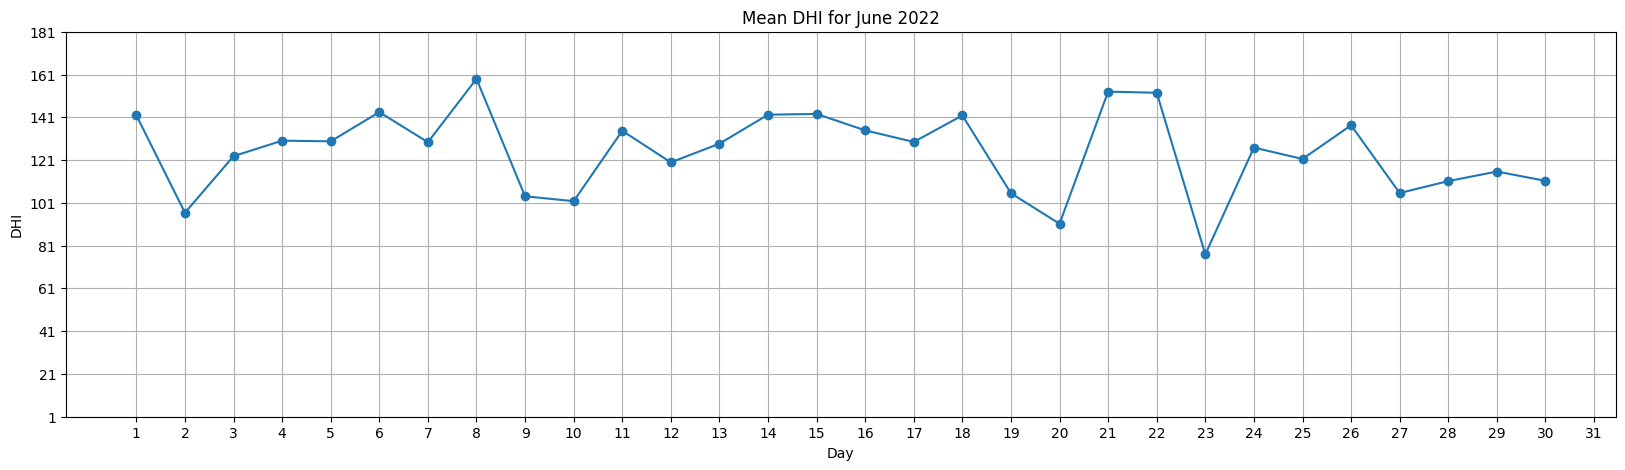

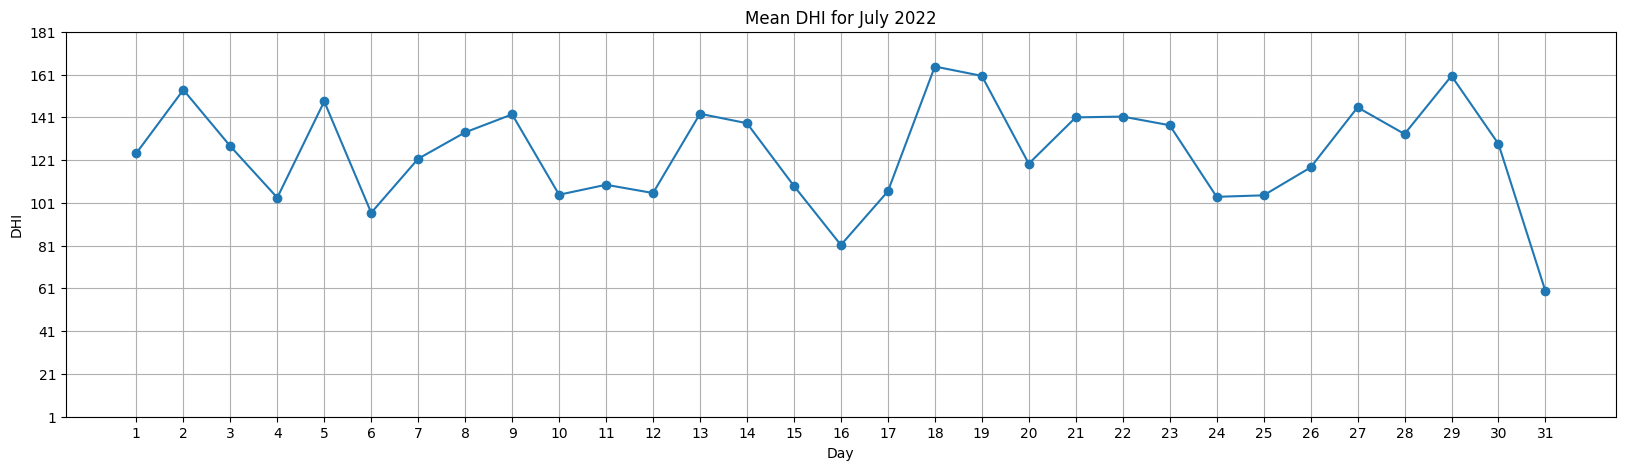

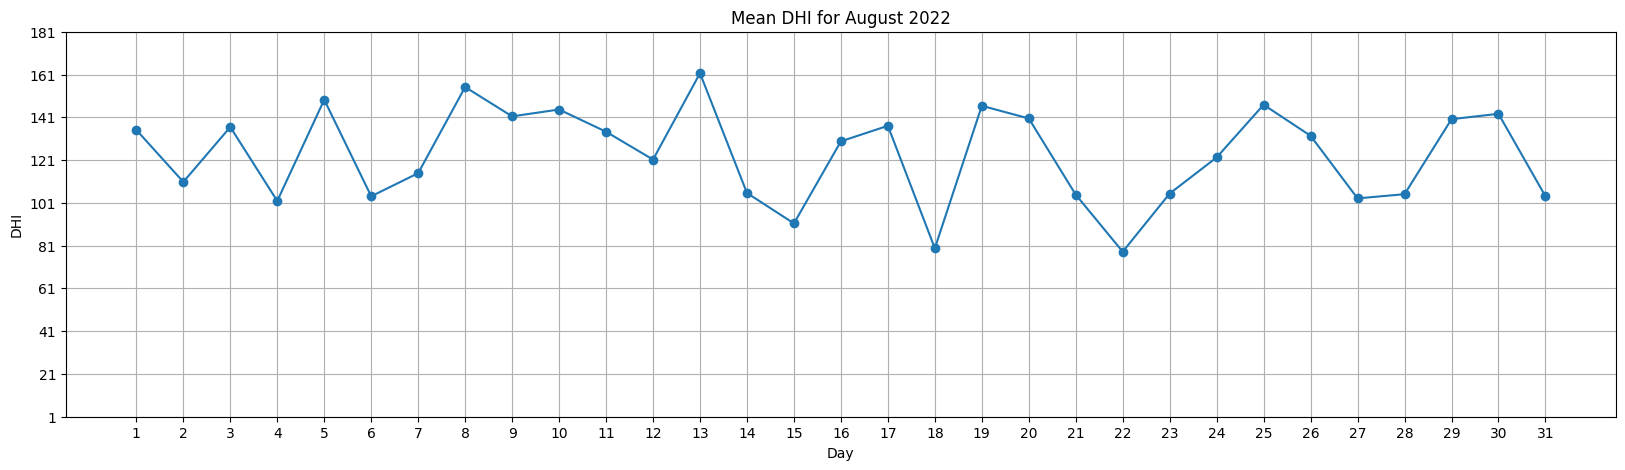

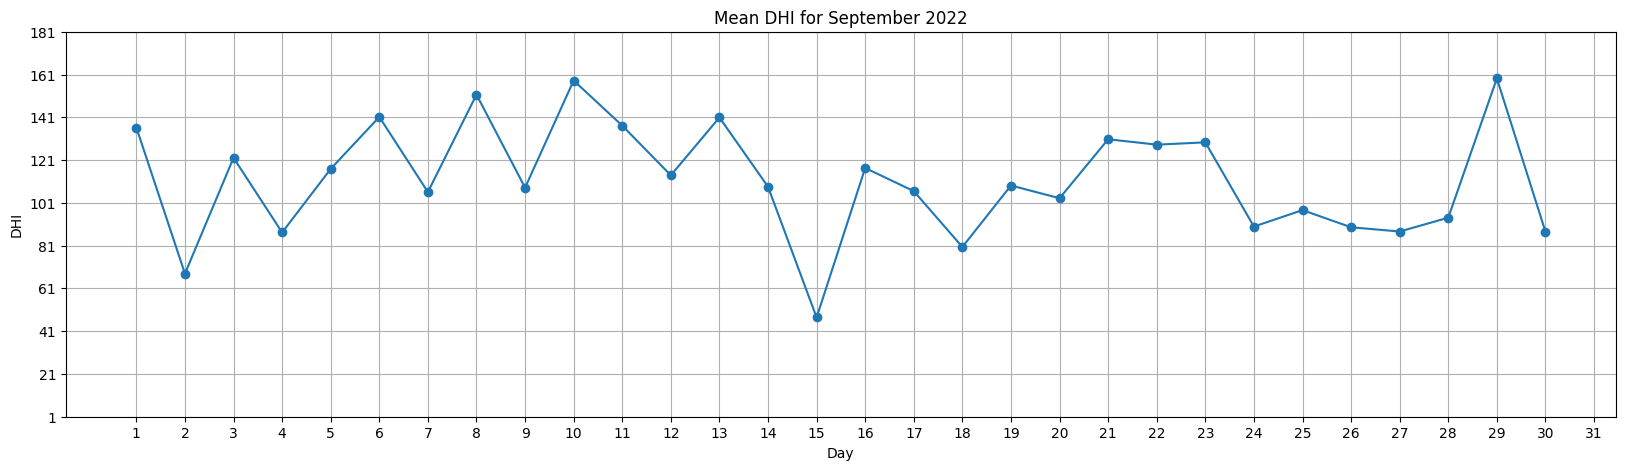

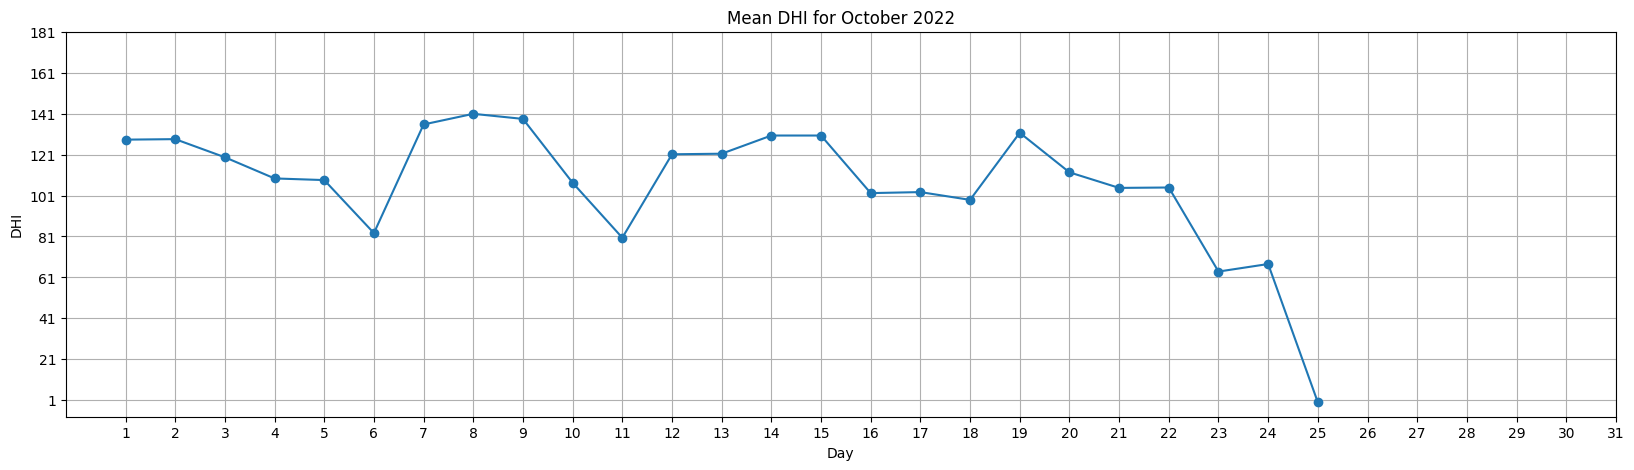

In [37]:
for idx, row in mean_dhi_by_day.iterrows():
    ymax = int(math.ceil(row.max() / 100.0)) * 100

    plt.figure(figsize=(20, 5))
    plt.grid(True)

    plt.plot(row.index, row.values, marker="o")
    plt.xticks(ticks=np.arange(1, 32, step=1))
    plt.yticks(ticks=np.arange(1, ymax + 1, step=20))

    plt.title(f"Mean DHI for {months[idx[0]]} {idx[1]}")

    plt.xlabel("Day")
    plt.ylabel("DHI")

    plt.show()